# Setup

In [28]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
training = pd.read_csv('./playground-series-s5e11/train.csv', index_col='id')
testing = pd.read_csv('./playground-series-s5e11/test.csv', index_col='id')

training.head(5)

annual_income  debt_to_income_ratio  credit_score  loan_amount  \
id                                                                   
0        29367.99                 0.084           736      2528.42   
1        22108.02                 0.166           636      4593.10   
2        49566.20                 0.097           694     17005.15   
3        46858.25                 0.065           533      4682.48   
4        25496.70                 0.053           665     12184.43   

    interest_rate  gender marital_status education_level employment_status  \
id                                                                           
0           13.67  Female         Single     High School     Self-employed   
1           12.92    Male        Married        Master's          Employed   
2            9.76    Male         Single     High School          Employed   
3           16.10  Female         Single     High School          Employed   
4           10.21    Male        Married     High School          Employed   

          loan_purpose grade_subgrade  loan_paid_back  
id                                                     
0                Other             C3             1.0  
1   Debt consolidation             D3             0.0  
2   Debt consolidation             C5             1.0  
3   Debt consolidation             F1             1.0  
4                Other             D1             1.0

In [30]:
training.shape

(593994, 12)

# EDA

In [31]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


annual_income  debt_to_income_ratio   credit_score    loan_amount  \
count   593994.000000         593994.000000  593994.000000  593994.000000   
unique            NaN                   NaN            NaN            NaN   
top               NaN                   NaN            NaN            NaN   
freq              NaN                   NaN            NaN            NaN   
mean     48212.202976              0.120696     680.916009   15020.297629   
std      26711.942078              0.068573      55.424956    6926.530568   
min       6002.430000              0.011000     395.000000     500.090000   
25%      27934.400000              0.072000     646.000000   10279.620000   
50%      46557.680000              0.096000     682.000000   15000.220000   
75%      60981.320000              0.156000     719.000000   18858.580000   
max     393381.740000              0.627000     849.000000   48959.950000   

        interest_rate  gender marital_status education_level  \
count   593994.000000  593994         593994          593994   
unique            NaN       3              4               5   
top               NaN  Female         Single      Bachelor's   
freq              NaN  306175         288843          279606   
mean        12.356345     NaN            NaN             NaN   
std          2.008959     NaN            NaN             NaN   
min          3.200000     NaN            NaN             NaN   
25%         10.990000     NaN            NaN             NaN   
50%         12.370000     NaN            NaN             NaN   
75%         13.680000     NaN            NaN             NaN   
max         20.990000     NaN            NaN             NaN   

       employment_status        loan_purpose grade_subgrade  loan_paid_back  
count             593994              593994         593994   593994.000000  
unique                 5                   8             30             NaN  
top             Employed  Debt consolidation             C3             NaN  
freq              450645              324695          58695             NaN  
mean                 NaN                 NaN            NaN        0.798820  
std                  NaN                 NaN            NaN        0.400883  
min                  NaN                 NaN            NaN        0.000000  
25%                  NaN                 NaN            NaN        1.000000  
50%                  NaN                 NaN            NaN        1.000000  
75%                  NaN                 NaN            NaN        1.000000  
max                  NaN                 NaN            NaN        1.000000

In [32]:
training.describe().T

count          mean           std       min  \
annual_income         593994.0  48212.202976  26711.942078  6002.430   
debt_to_income_ratio  593994.0      0.120696      0.068573     0.011   
credit_score          593994.0    680.916009     55.424956   395.000   
loan_amount           593994.0  15020.297629   6926.530568   500.090   
interest_rate         593994.0     12.356345      2.008959     3.200   
loan_paid_back        593994.0      0.798820      0.400883     0.000   

                            25%        50%        75%         max  
annual_income         27934.400  46557.680  60981.320  393381.740  
debt_to_income_ratio      0.072      0.096      0.156       0.627  
credit_score            646.000    682.000    719.000     849.000  
loan_amount           10279.620  15000.220  18858.580   48959.950  
interest_rate            10.990     12.370     13.680      20.990  
loan_paid_back            1.000      1.000      1.000       1.000

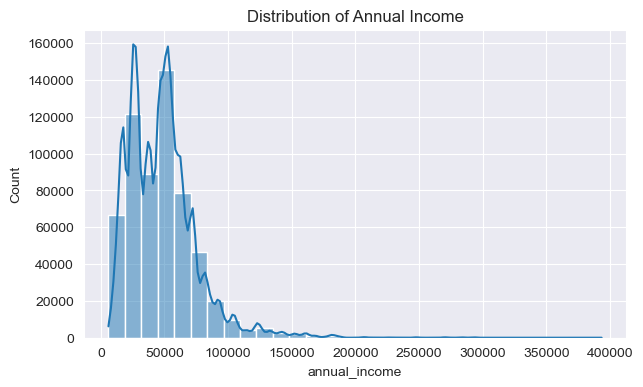

In [33]:
plt.figure(figsize=(7,4))
sns.histplot(training["annual_income"], kde=True, bins=30)
plt.title("Distribution of Annual Income")
plt.show()

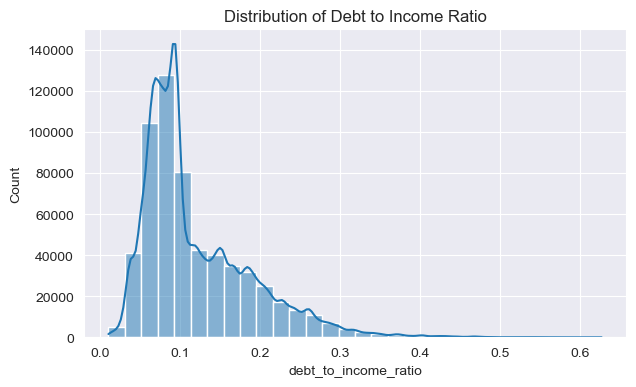

In [34]:
plt.figure(figsize=(7,4))
sns.histplot(training["debt_to_income_ratio"], kde=True, bins=30)
plt.title("Distribution of Debt to Income Ratio")
plt.show()

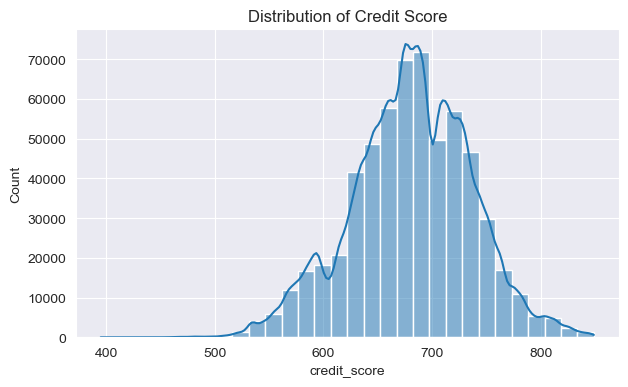

In [35]:
plt.figure(figsize=(7,4))
sns.histplot(training["credit_score"], kde=True, bins=30)
plt.title("Distribution of Credit Score")
plt.show()

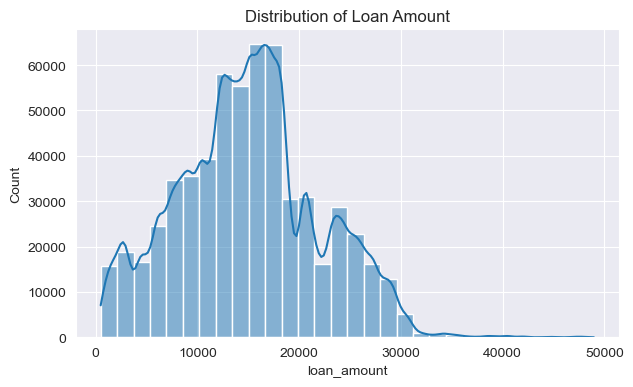

In [36]:
plt.figure(figsize=(7,4))
sns.histplot(training["loan_amount"], kde=True, bins=30)
plt.title("Distribution of Loan Amount")
plt.show()

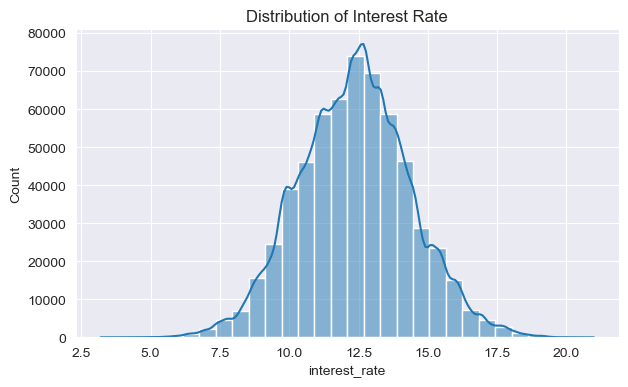

In [37]:
plt.figure(figsize=(7,4))
sns.histplot(training["interest_rate"], kde=True, bins=30)
plt.title("Distribution of Interest Rate")
plt.show()

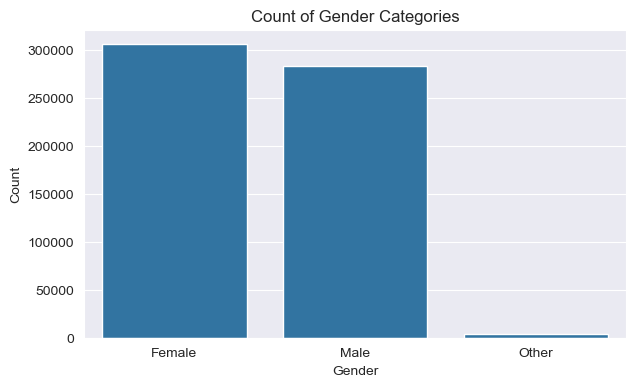

In [38]:
plt.figure(figsize=(7,4))
sns.countplot(x="gender", data=training)
plt.title("Count of Gender Categories")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

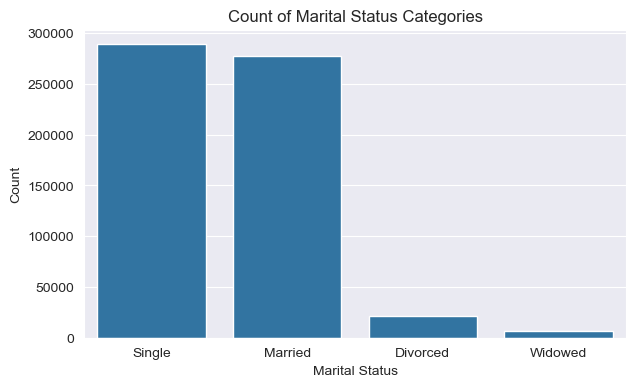

In [39]:
plt.figure(figsize=(7,4))
sns.countplot(x="marital_status", data=training)
plt.title("Count of Marital Status Categories")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

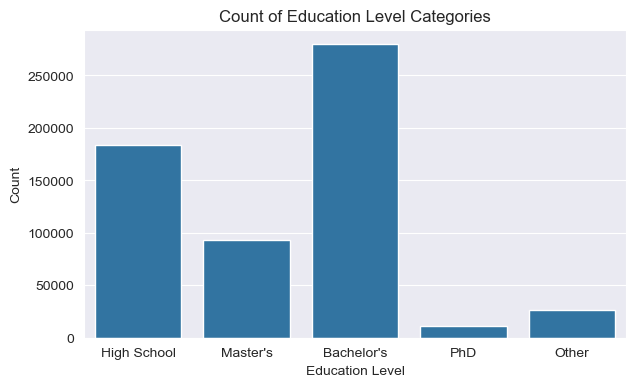

In [40]:
plt.figure(figsize=(7,4))
sns.countplot(x="education_level", data=training)
plt.title("Count of Education Level Categories")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

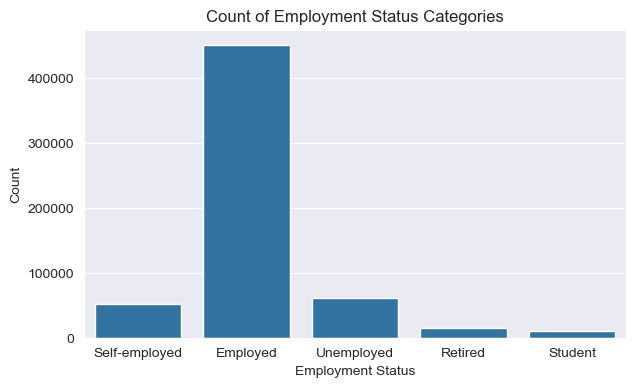

In [41]:
plt.figure(figsize=(7,4))
sns.countplot(x="employment_status", data=training)
plt.title("Count of Employment Status Categories")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

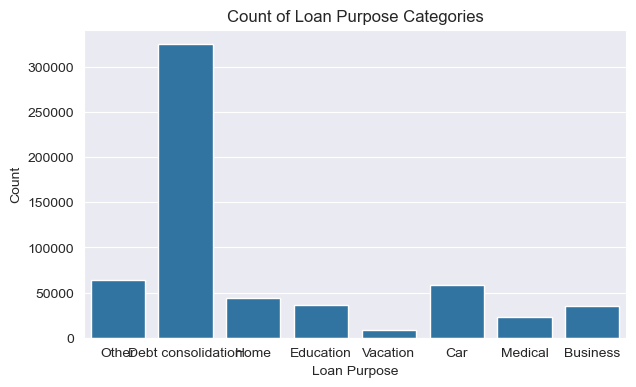

In [42]:
plt.figure(figsize=(7,4))
sns.countplot(x="loan_purpose", data=training)
plt.title("Count of Loan Purpose Categories")
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.show()

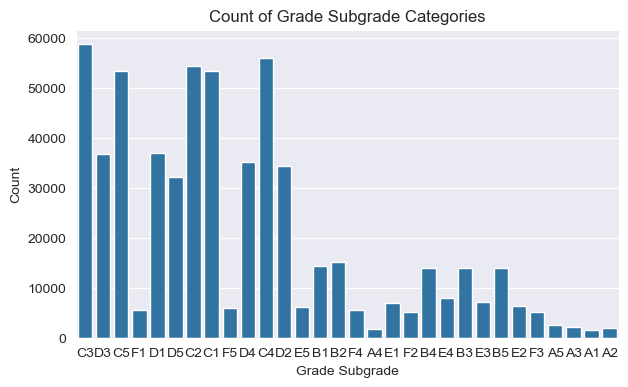

In [43]:
plt.figure(figsize=(7,4))
sns.countplot(x="grade_subgrade", data=training)
plt.title("Count of Grade Subgrade Categories")
plt.xlabel("Grade Subgrade")
plt.ylabel("Count")
plt.show()

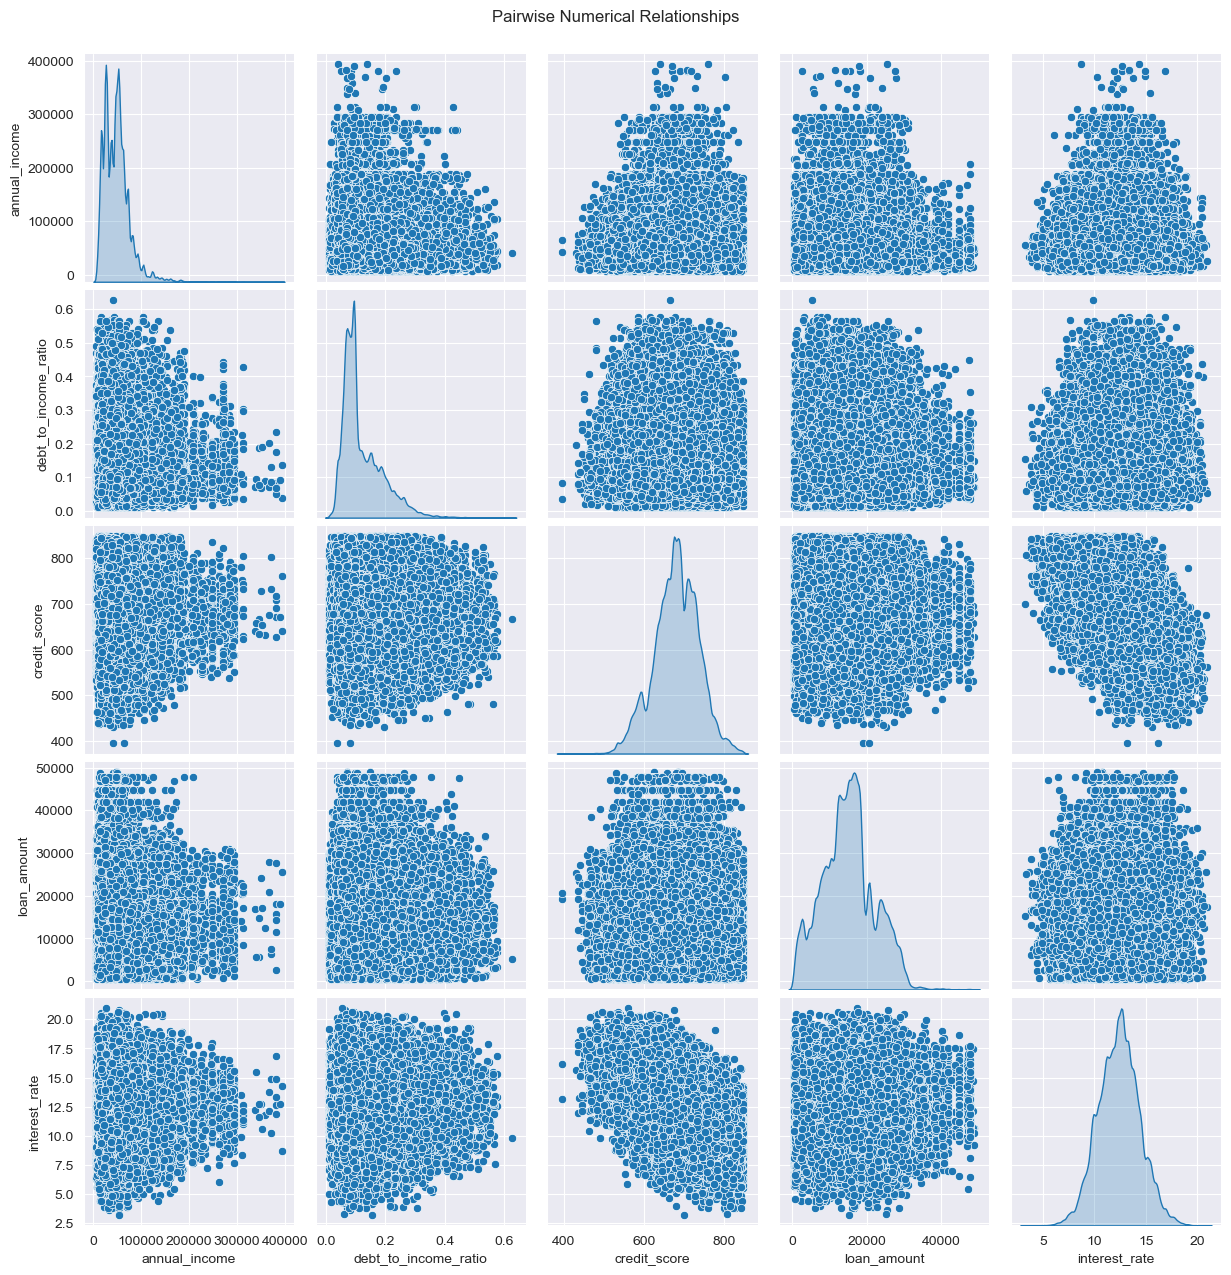

annual_income  debt_to_income_ratio  credit_score  \
annual_income              1.000000              0.000553      0.001509   
debt_to_income_ratio       0.000553              1.000000     -0.061617   
credit_score               0.001509             -0.061617      1.000000   
loan_amount               -0.003407             -0.008236     -0.005761   
interest_rate             -0.002507              0.030316     -0.538335   

                      loan_amount  interest_rate  
annual_income           -0.003407      -0.002507  
debt_to_income_ratio    -0.008236       0.030316  
credit_score            -0.005761      -0.538335  
loan_amount              1.000000      -0.001174  
interest_rate           -0.001174       1.000000

In [44]:
numerical_vars = ["annual_income","debt_to_income_ratio","credit_score", "loan_amount", "interest_rate"]
sns.pairplot(training[numerical_vars], diag_kind="kde")
plt.suptitle("Pairwise Numerical Relationships", y=1.02)
plt.show()

training[numerical_vars].corr()

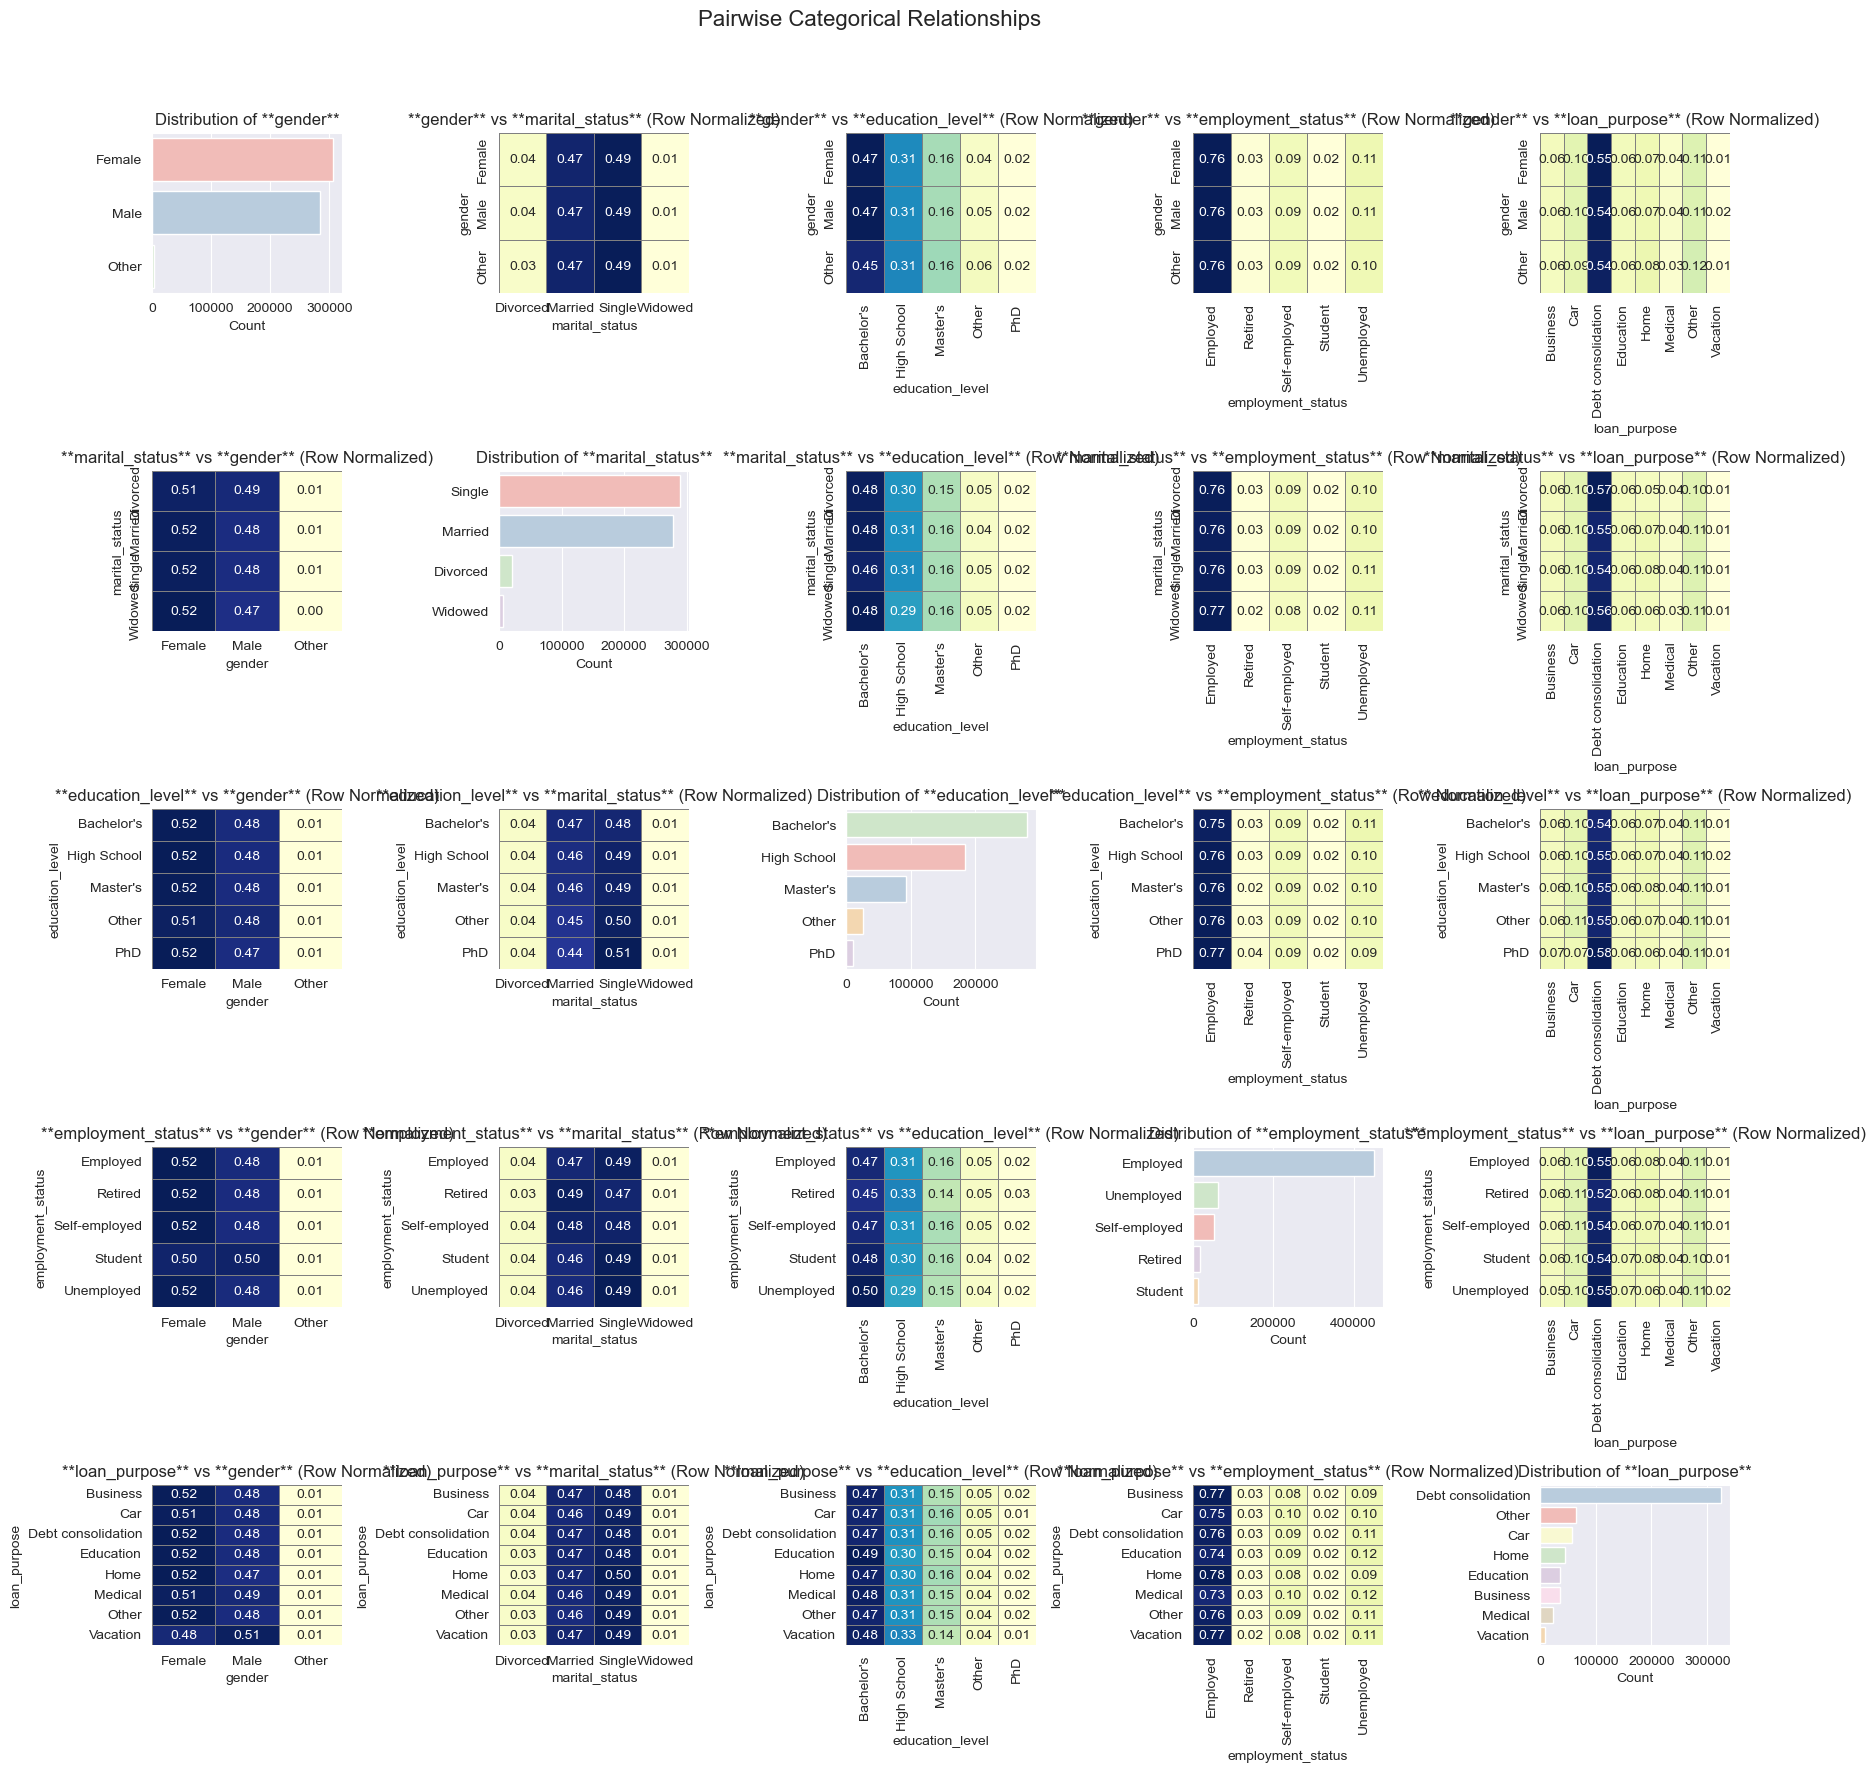

In [45]:
categorical_vars = ["gender","marital_status","education_level", "employment_status", "loan_purpose"]
n_categorical_vars = len(categorical_vars)

fig, axes = plt.subplots(n_categorical_vars, n_categorical_vars, figsize=(n_categorical_vars * 3.5, n_categorical_vars * 3.5))
plt.suptitle("Pairwise Categorical Relationships", y=1.01, fontsize=16)

for i in range(n_categorical_vars):
    for j in range(n_categorical_vars):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # --- Diagonal (i == j): Individual Distribution (Count Plot) ---
        if i == j:
            # Use countplot to show the frequency of each category
            sns.countplot(
                y=training[var1],
                ax=axes[i, j],
                hue=training[var1],
                palette="Pastel1",
                order=training[var1].value_counts().index,
                legend=False
            )
            axes[i, j].set_title(f"Distribution of **{var1}**", fontsize=12)
            axes[i, j].set_ylabel("")
            axes[i, j].set_xlabel("Count")

        # --- Off-Diagonal (i != j): Pairwise Relationship (Heatmap) ---
        else:
            # 1. Create a contingency table (cross-tabulation)
            # Normalize='index' (row-wise) shows the distribution of var2 *within* each category of var1
            contingency_table = pd.crosstab(training[var1], training[var2], normalize='index')

            # 2. Plot the contingency table as a heatmap
            sns.heatmap(
                contingency_table,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                cbar=False,
                ax=axes[i, j],
                linewidths=.5,
                linecolor='gray'
            )
            axes[i, j].set_title(f"**{var1}** vs **{var2}** (Row Normalized)", fontsize=12)
            axes[i, j].set_ylabel(var1)
            axes[i, j].set_xlabel(var2)

# Improve layout spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Splitting and Preparing the Data

In [46]:
def create_features(df):
    df = df.copy()
    # Ratio of Debt to Income is already there, let's make Income to Loan
    # Logic: People with high income relative to loan size are safer
    df['income_loan_ratio'] = df['annual_income'] / (df['loan_amount'] + 1)

    # Disposable Income Estimate
    # Logic: Income minus expected debt payments might be a better predictor
    df['disposable_income'] = df['annual_income'] * (1 - df['debt_to_income_ratio'])

    return df

training = create_features(training)
testing = create_features(testing)

In [47]:
from sklearn.model_selection import train_test_split

full_categorical_vars = categorical_vars + ["grade_subgrade"]
full_vars = numerical_vars + full_categorical_vars

X = training[full_vars]
y = training["loan_paid_back"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_train.shape, X_test.shape

((415795, 11), (178199, 11))

Because the data is skewed with very few people Defaulting on their loans, I need to make sure my training data is not bias. So I will use boostraping on my training data.

In [48]:
from sklearn.utils import resample

print(f"Original Train Counts:\n{y_train.value_counts()}")

train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data.loan_paid_back == 1]
minority = train_data[train_data.loan_paid_back == 0]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

train_data_balanced = pd.concat([majority, minority_upsampled])
train_data_balanced = train_data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X_train = train_data_balanced.drop('loan_paid_back', axis=1)
y_train = train_data_balanced['loan_paid_back']

print(f"Balanced Train Counts:\n{y_train.value_counts()}")

Original Train Counts:
loan_paid_back
1.0    332392
0.0     83403
Name: count, dtype: int64
Balanced Train Counts:
loan_paid_back
0.0    332392
1.0    332392
Name: count, dtype: int64


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[numerical_vars])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=numerical_vars,
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[numerical_vars])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=numerical_vars,
    index=X_test.index
)

Here I scaled the data since income is significantly larger than interest rate. I scale the data for all models

In [50]:
X_train_cat = pd.get_dummies(X_train[categorical_vars], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_vars], drop_first=True)

X_train_encoded_cat, X_test_encoded_cat = X_train_cat.align(
    X_test_cat,
    join='left',
    axis=1,
    fill_value=0
)

print(X_train_cat.shape, X_test_cat.shape)

X_train_cat = pd.concat([X_train_scaled_df, X_train_encoded_cat], axis=1)
X_test_cat = pd.concat([X_test_scaled_df, X_test_encoded_cat], axis=1)

(664784, 20) (178199, 20)


In [51]:
X_train_full = pd.get_dummies(X_train[full_categorical_vars], drop_first=True)
X_test_full = pd.get_dummies(X_test[full_categorical_vars], drop_first=True)

X_train_encoded_cat_full, X_test_encoded_cat_full = X_train_full.align(
    X_test_full,
    join='left',
    axis=1,
    fill_value=0
)

print(X_train_full.shape, X_test_full.shape)

X_train_full = pd.concat([X_train_scaled_df, X_train_encoded_cat_full], axis=1)
X_test_full = pd.concat([X_test_scaled_df, X_test_encoded_cat_full], axis=1)

(664784, 49) (178199, 49)


In [52]:
X_train_full.head()

annual_income  debt_to_income_ratio  credit_score  loan_amount  \
0       0.235828              1.255886      0.968334    -0.240341   
1      -0.618646             -0.563929     -0.165068     1.485890   
2      -0.663634              0.300806      1.004315     0.208898   
3      -0.686860             -0.512303     -0.848708    -0.382689   
4       0.939451              0.210460     -0.039134    -1.195815   

   interest_rate  gender_Male  gender_Other  marital_status_Married  \
0      -2.164065         True         False                   False   
1      -0.601779        False         False                    True   
2      -0.105816         True         False                   False   
3      -0.229807         True         False                    True   
4      -1.137420         True         False                    True   

   marital_status_Single  marital_status_Widowed  ...  grade_subgrade_E1  \
0                   True                   False  ...              False   
1                  False                   False  ...              False   
2                   True                   False  ...              False   
3                  False                   False  ...              False   
4                  False                   False  ...              False   

   grade_subgrade_E2  grade_subgrade_E3  grade_subgrade_E4  grade_subgrade_E5  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   grade_subgrade_F1  grade_subgrade_F2  grade_subgrade_F3  grade_subgrade_F4  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   grade_subgrade_F5  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 54 columns]

# Evaluation Function

In [53]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_ap = average_precision_score(y_test, y_prob_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f} | Train AUC: {train_auc:.4f}")
    print(f"Test  Accuracy: {test_acc:.4f} | Test  AUC: {test_auc:.4f}")

    if (train_acc - test_acc) > 0.05:
         print("⚠️ Warning: Signs of Overfitting (Train is much better than Test)")
    else:
         print("✅ Model seems balanced")
    print("-" * 30)

    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {test_ap:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": test_acc,
        "auc": test_auc,
        "average_precision": test_ap,
        "train_accuracy": train_acc,
        "train_auc": train_auc
    }

# PLA Pocket

--- PLA Cat ---
Train Accuracy: 0.7472 | Train AUC: 0.8505
Test  Accuracy: 0.6742 | Test  AUC: 0.8517
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


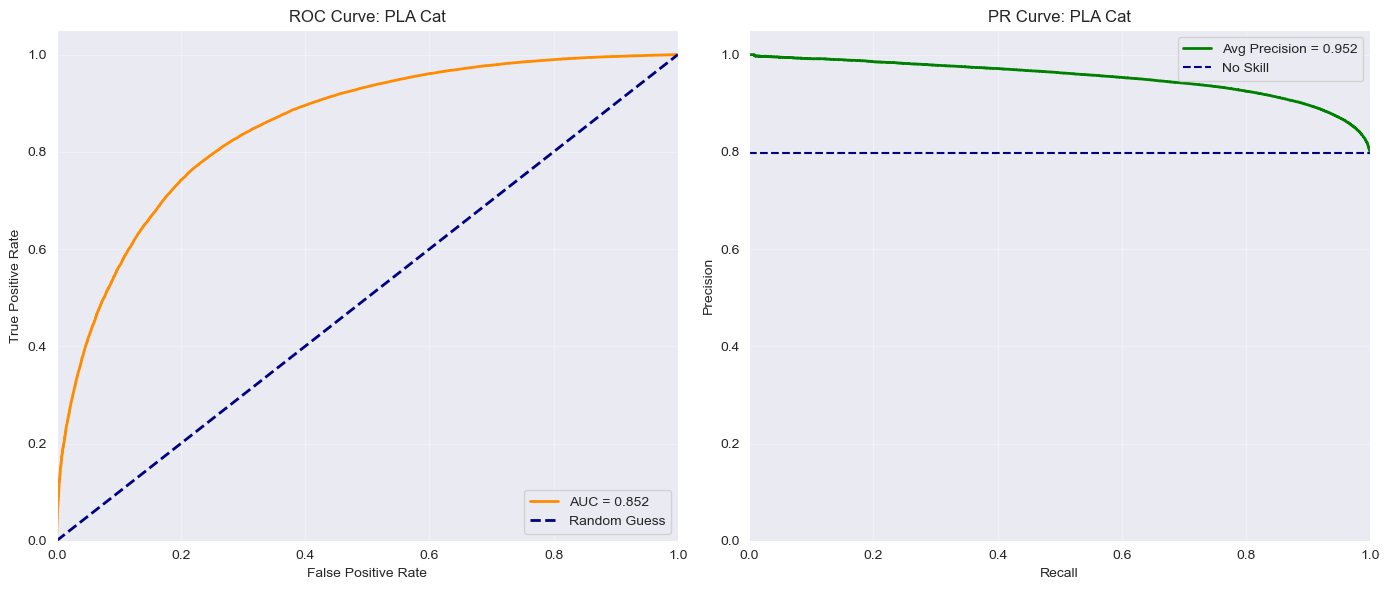

--- PLA Full ---
Train Accuracy: 0.7794 | Train AUC: 0.8475
Test  Accuracy: 0.8812 | Test  AUC: 0.8478
✅ Model seems balanced
------------------------------


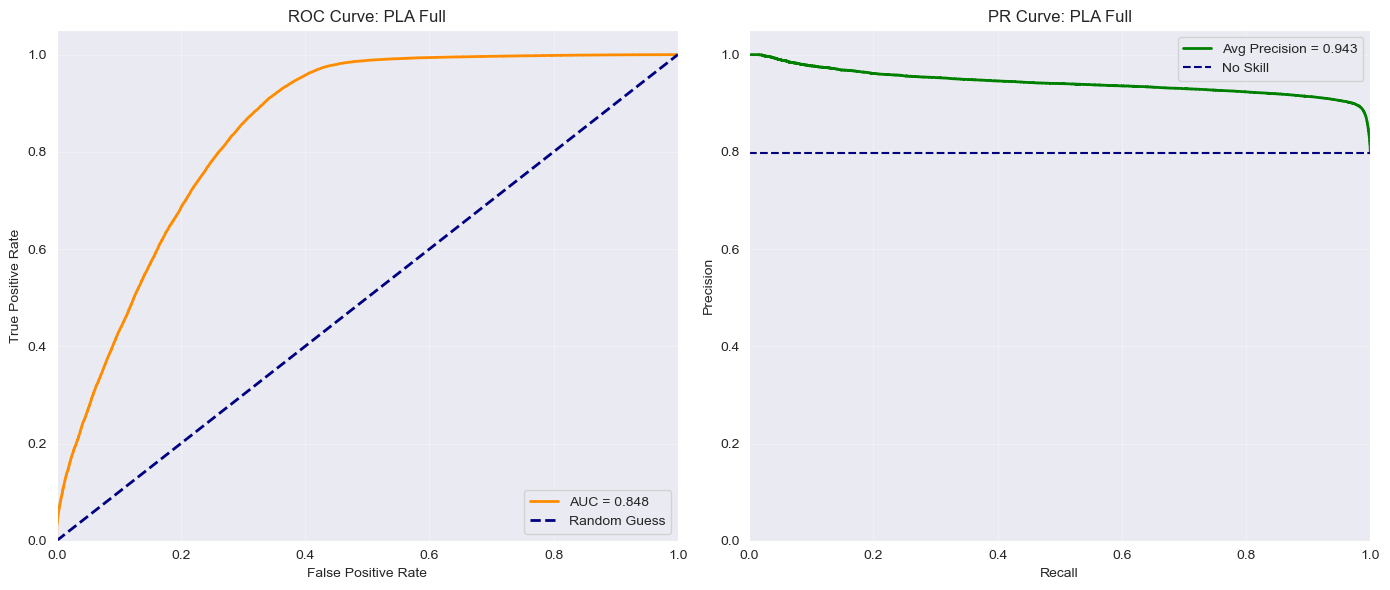

In [54]:
from sklearn.linear_model import Perceptron

results = []

pla_cat = Perceptron(max_iter=1000, random_state=42)
results.append(
    evaluate_and_graph(pla_cat, X_train_cat, y_train, X_test_cat, y_test, "PLA Cat", True)
)

pla_full = Perceptron(max_iter=1000, random_state=42)
results.append(
    evaluate_and_graph(pla_full, X_train_full, y_train, X_test_full, y_test, "PLA Full", True)
)

# Logistic Regression Model

--- Logistic Regression Cat ---
Train Accuracy: 0.8259 | Train AUC: 0.9098
Test  Accuracy: 0.8614 | Test  AUC: 0.9112
✅ Model seems balanced
------------------------------


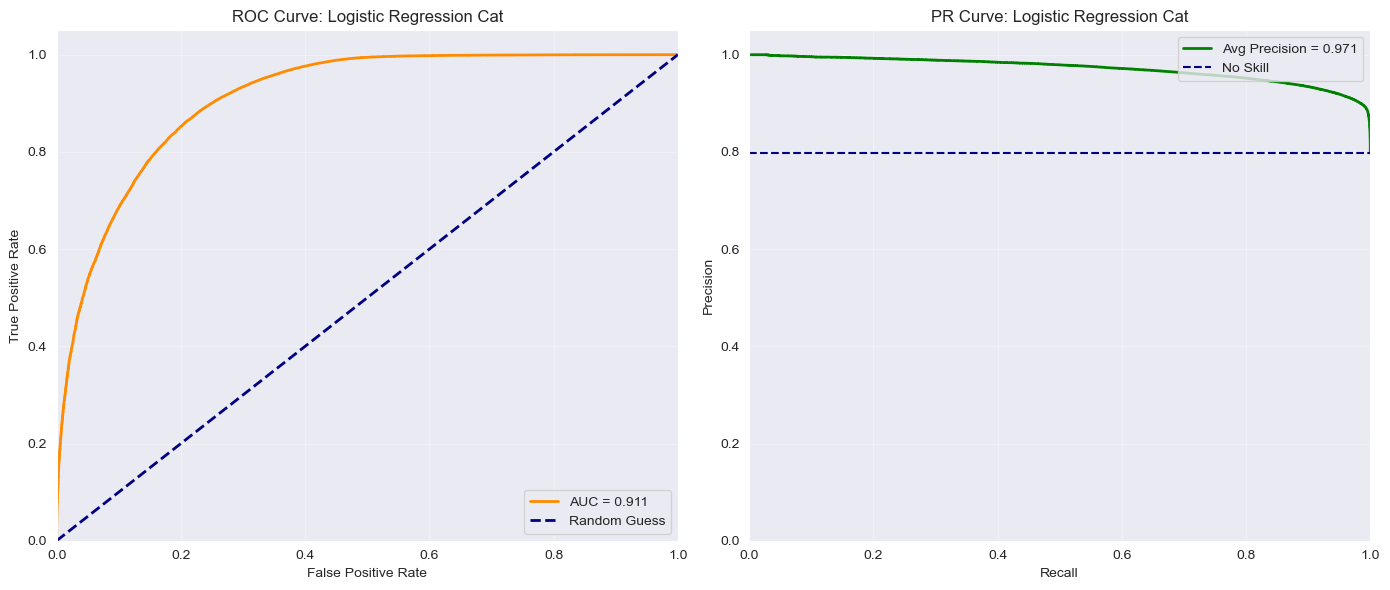

--- Logistic Regression Full ---
Train Accuracy: 0.8269 | Train AUC: 0.9105
Test  Accuracy: 0.8630 | Test  AUC: 0.9117
✅ Model seems balanced
------------------------------


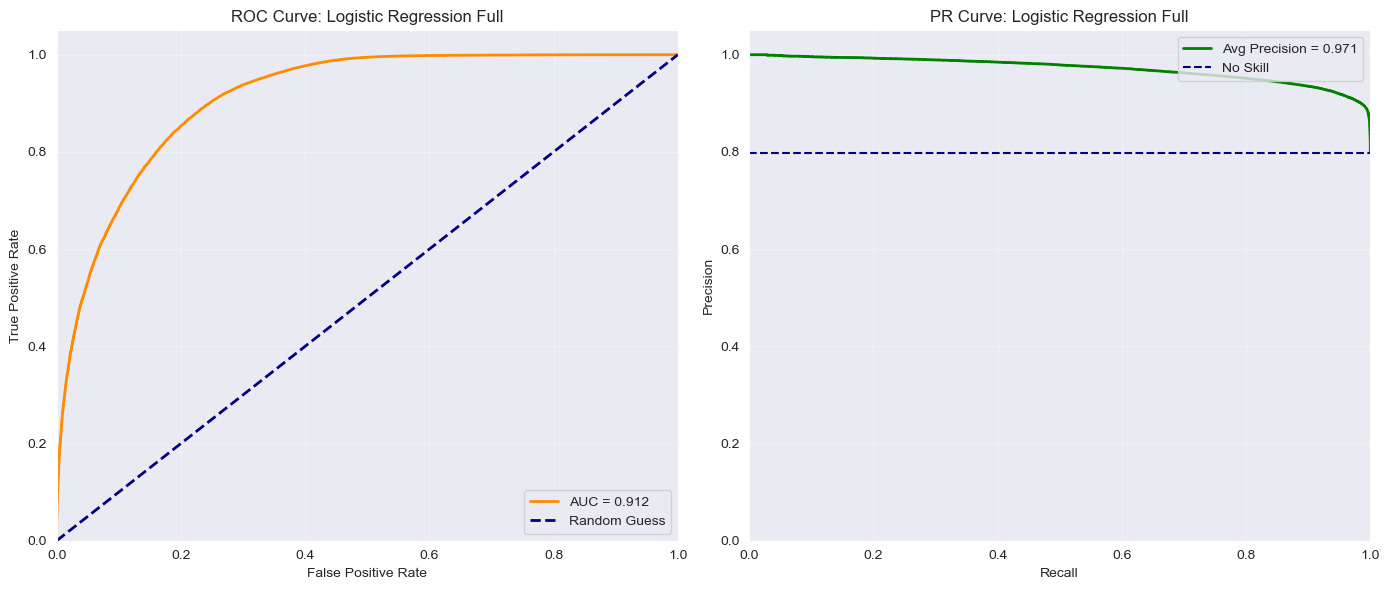

In [55]:
from sklearn.linear_model import LogisticRegression

lr_cat = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr_cat, X_train_cat, y_train, X_test_cat, y_test, "Logistic Regression Cat", True)
)

lr_full = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr_full, X_train_full, y_train, X_test_full, y_test, "Logistic Regression Full", True)
)

# Softmax

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


--- Softmax Regression Cat ---
Train Accuracy: 0.8259 | Train AUC: 0.9098
Test  Accuracy: 0.8614 | Test  AUC: 0.9112
✅ Model seems balanced
------------------------------


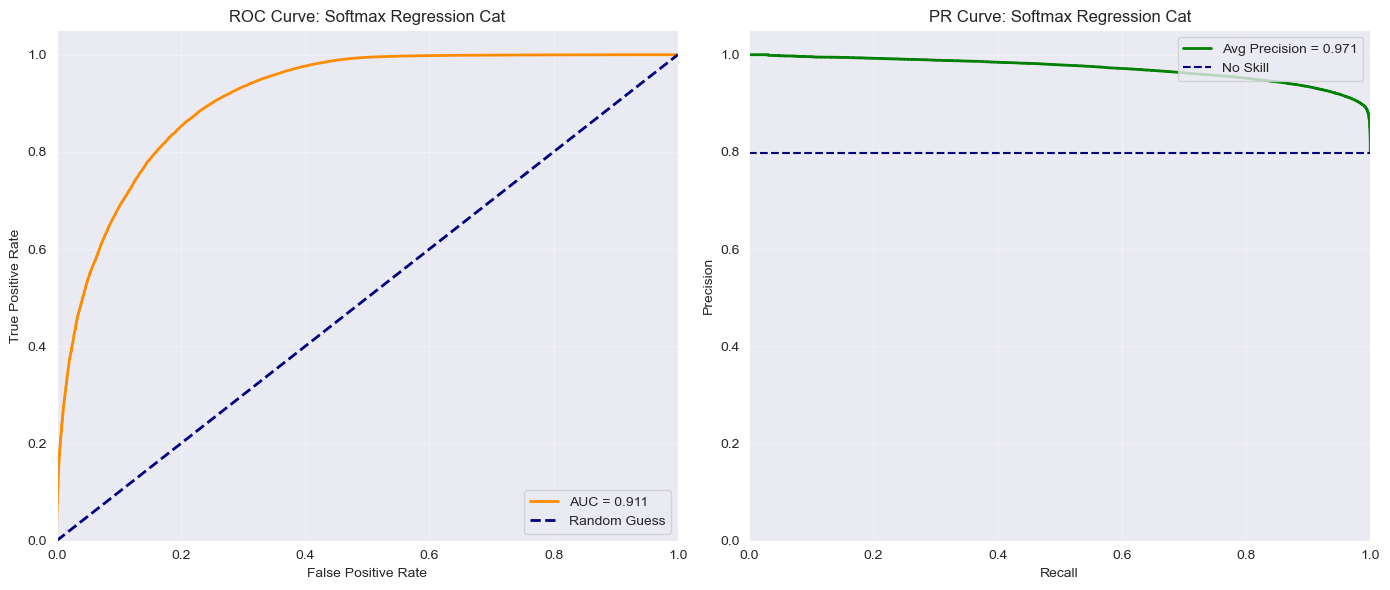

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


--- Softmax Regression Cat ---
Train Accuracy: 0.8269 | Train AUC: 0.9105
Test  Accuracy: 0.8630 | Test  AUC: 0.9117
✅ Model seems balanced
------------------------------


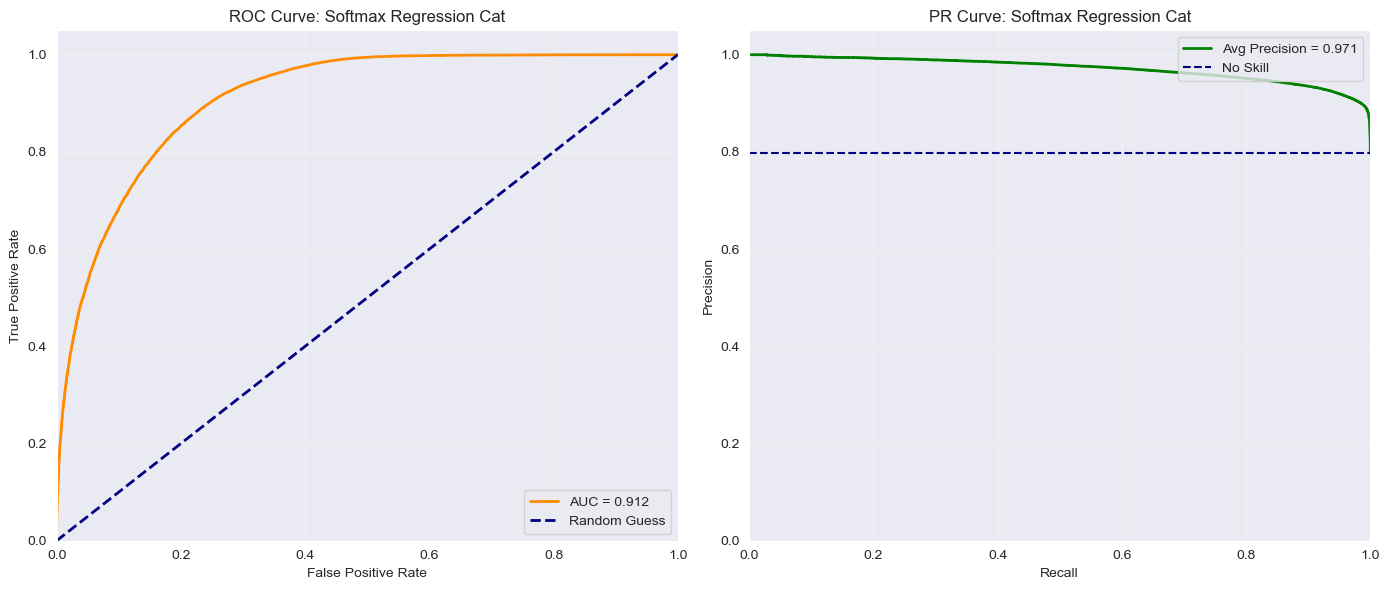

In [56]:
softmax_cat = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
results.append(
    evaluate_and_graph(softmax_cat, X_train_cat, y_train, X_test_cat, y_test, "Softmax Regression Cat", True)
)

softmax_full = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
results.append(
    evaluate_and_graph(softmax_full, X_train_full, y_train, X_test_full, y_test, "Softmax Regression Cat", True)
)

# LDA

--- LDA Cat ---
Train Accuracy: 0.8192 | Train AUC: 0.9093
Test  Accuracy: 0.8814 | Test  AUC: 0.9107
✅ Model seems balanced
------------------------------


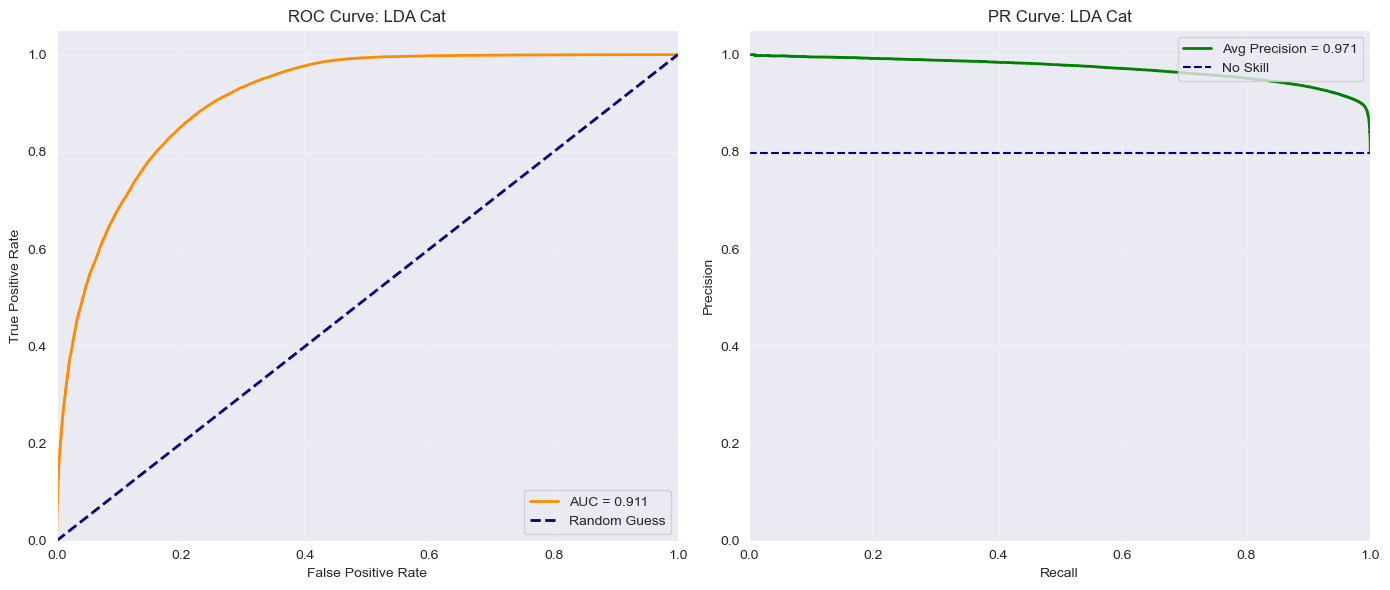

--- LDA Full ---
Train Accuracy: 0.8217 | Train AUC: 0.9101
Test  Accuracy: 0.8826 | Test  AUC: 0.9112
✅ Model seems balanced
------------------------------


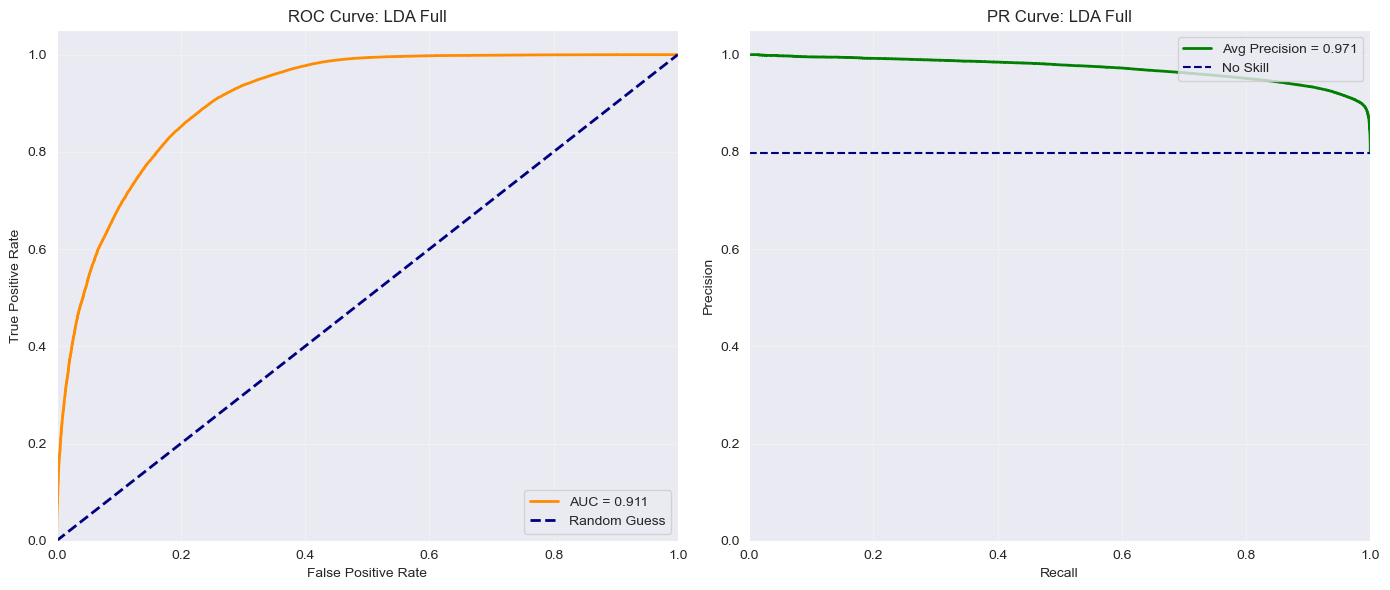

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_cat = LinearDiscriminantAnalysis()
results.append(
    evaluate_and_graph(lda_cat, X_train_cat, y_train, X_test_cat, y_test, "LDA Cat", True)
)

lda_full = LinearDiscriminantAnalysis()
results.append(
    evaluate_and_graph(lda_full, X_train_full, y_train, X_test_full, y_test, "LDA Full", True)
)

# QDA

--- QDA Cat ---
Train Accuracy: 0.8230 | Train AUC: 0.9035
Test  Accuracy: 0.8735 | Test  AUC: 0.9046
✅ Model seems balanced
------------------------------


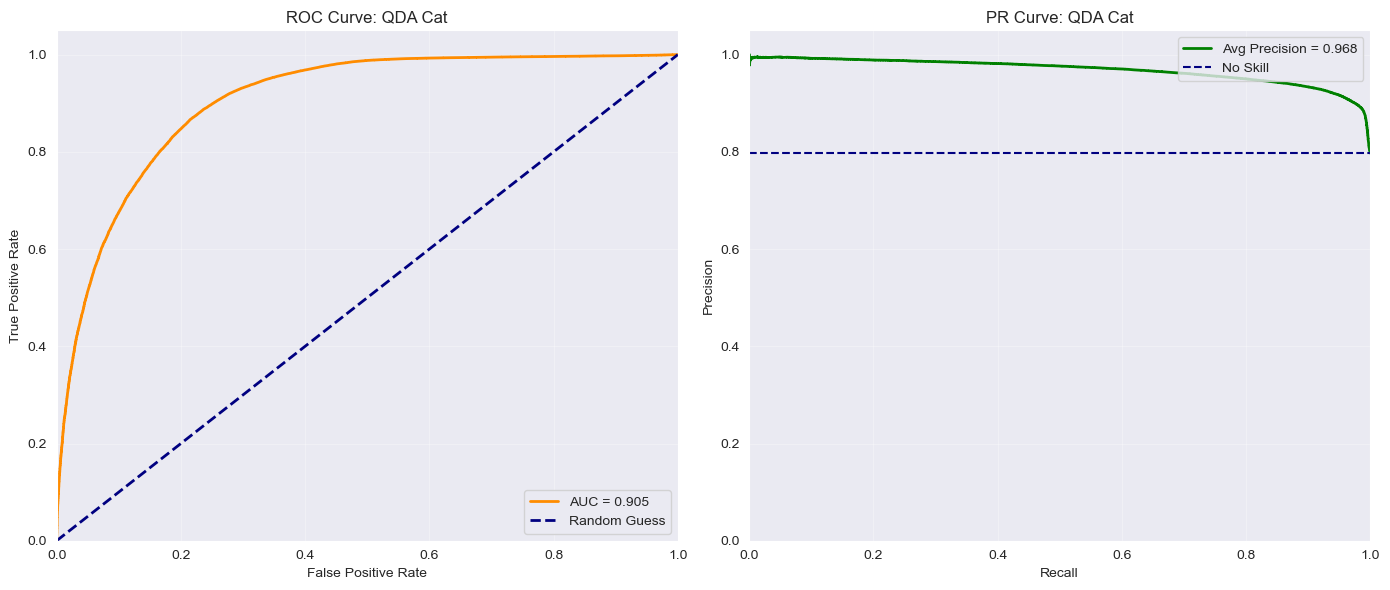

--- QDA Full ---
Train Accuracy: 0.8198 | Train AUC: 0.9008
Test  Accuracy: 0.8499 | Test  AUC: 0.9015
✅ Model seems balanced
------------------------------


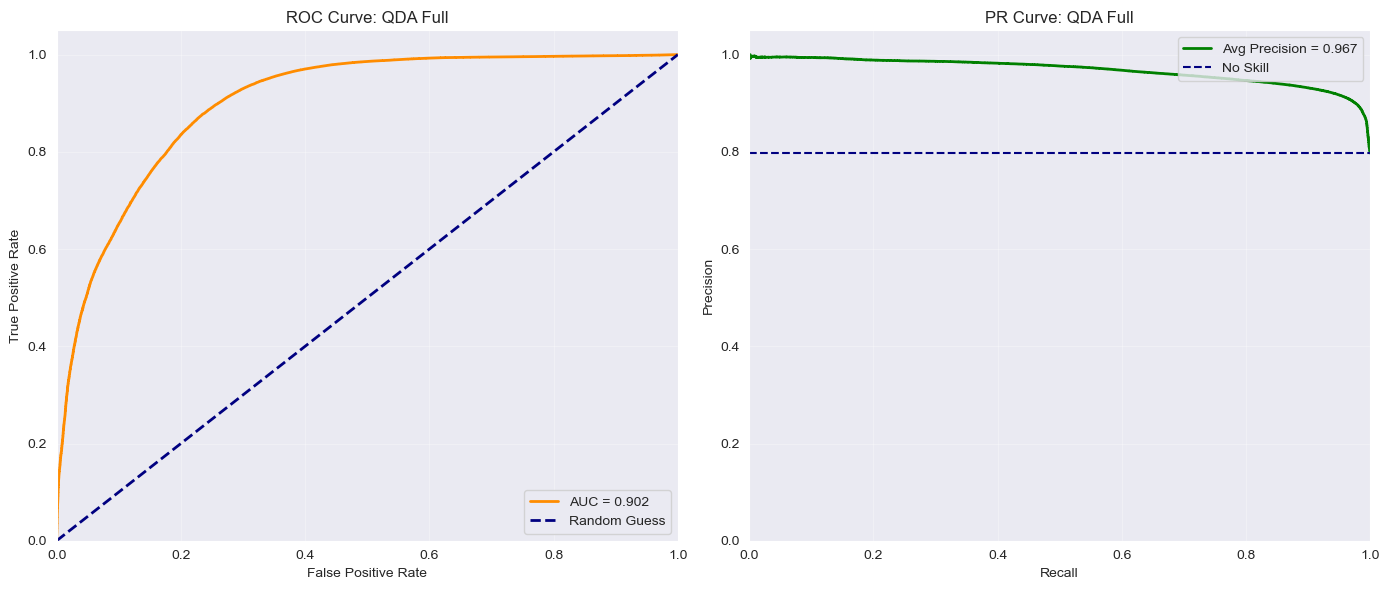

In [58]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_cat = QuadraticDiscriminantAnalysis(reg_param=0.1)
results.append(
    evaluate_and_graph(qda_cat, X_train_cat, y_train, X_test_cat, y_test, "QDA Cat", True)
)

qda_full = QuadraticDiscriminantAnalysis(reg_param=0.1)
results.append(
    evaluate_and_graph(qda_full, X_train_full, y_train, X_test_full, y_test, "QDA Full", True)
)

# Naive Bayes (Gaussian and Bernoulli)

--- Naive Bayes (Gaussian) Cat ---
Train Accuracy: 0.8069 | Train AUC: 0.8739
Test  Accuracy: 0.8277 | Test  AUC: 0.8733
✅ Model seems balanced
------------------------------


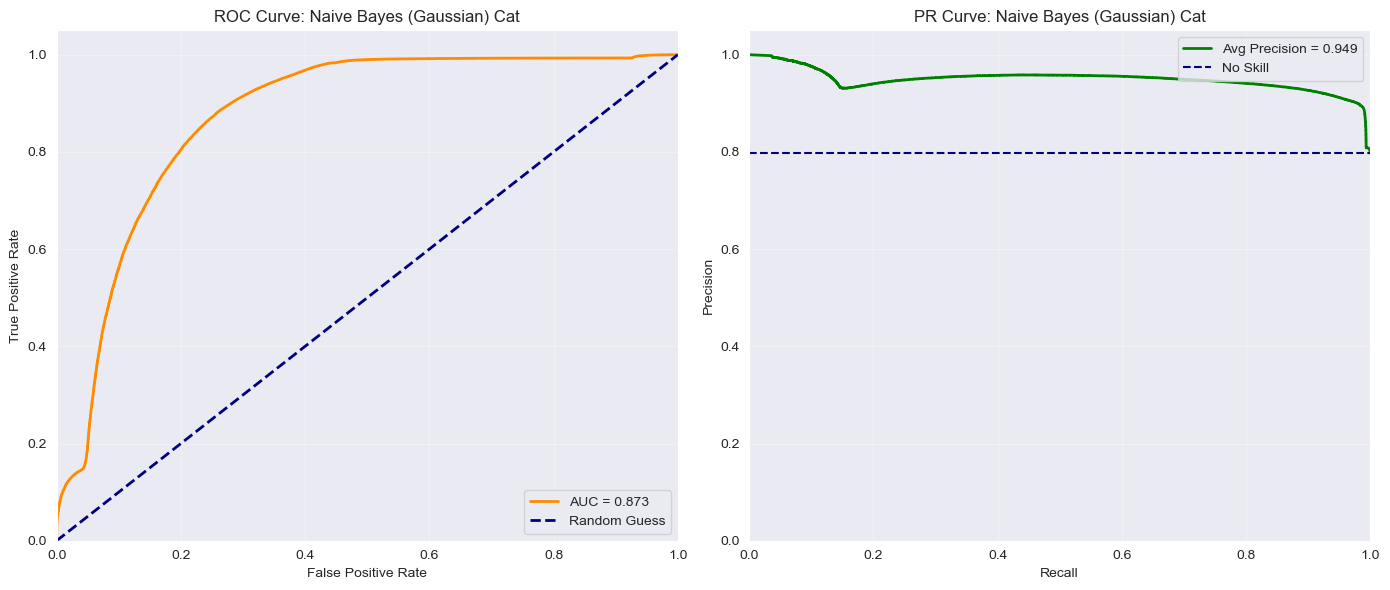

--- Naive Bayes (Gaussian) Full ---
Train Accuracy: 0.7558 | Train AUC: 0.8664
Test  Accuracy: 0.6846 | Test  AUC: 0.8668
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


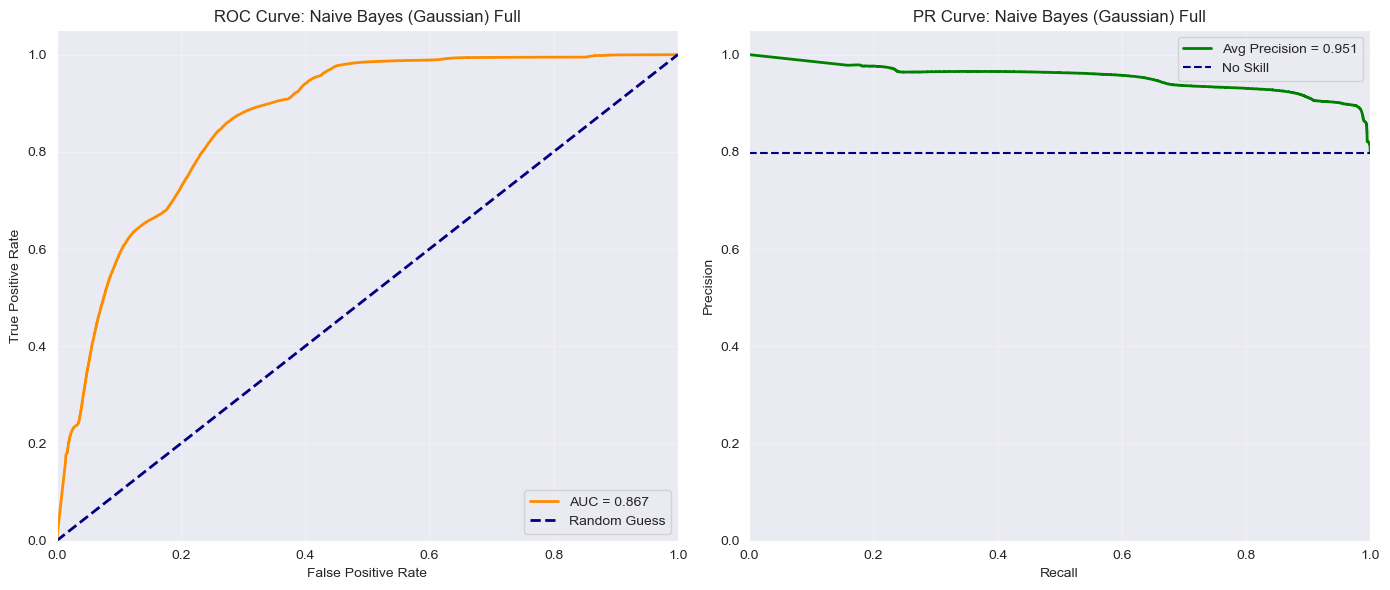

--- Naive Bayes (Bernoulli) Cat ---
Train Accuracy: 0.8122 | Train AUC: 0.8901
Test  Accuracy: 0.8517 | Test  AUC: 0.8907
✅ Model seems balanced
------------------------------


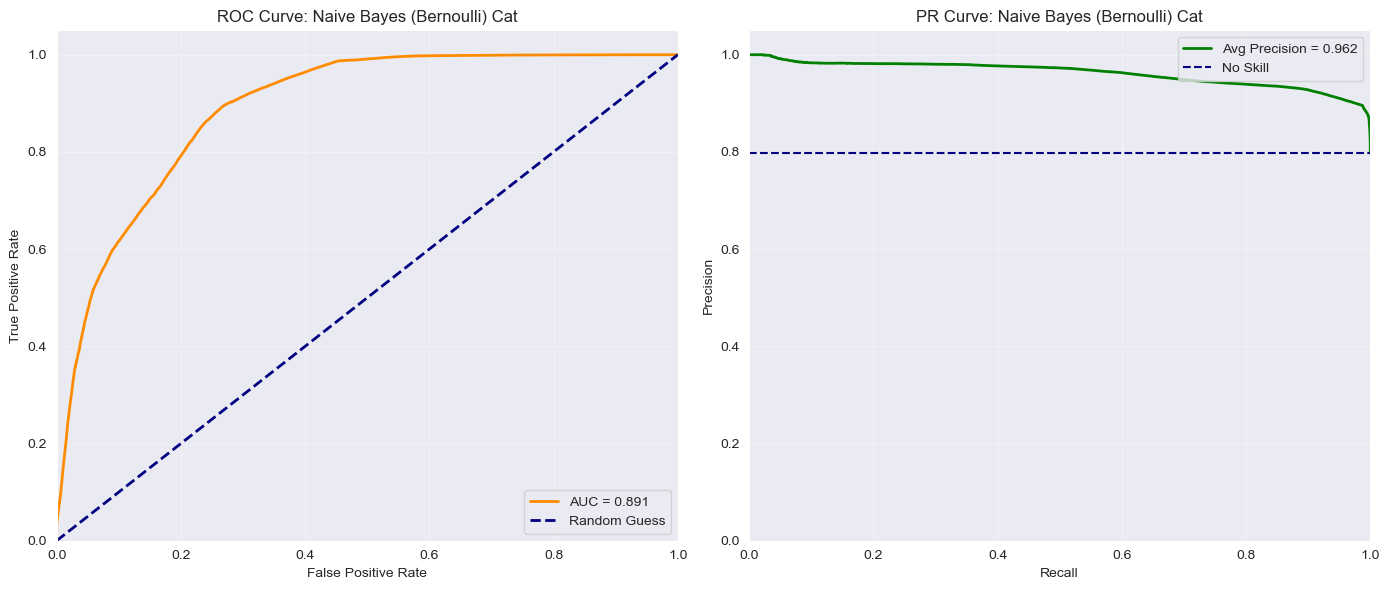

--- Naive Bayes (Bernoulli) Full ---
Train Accuracy: 0.7839 | Train AUC: 0.8880
Test  Accuracy: 0.7758 | Test  AUC: 0.8886
✅ Model seems balanced
------------------------------


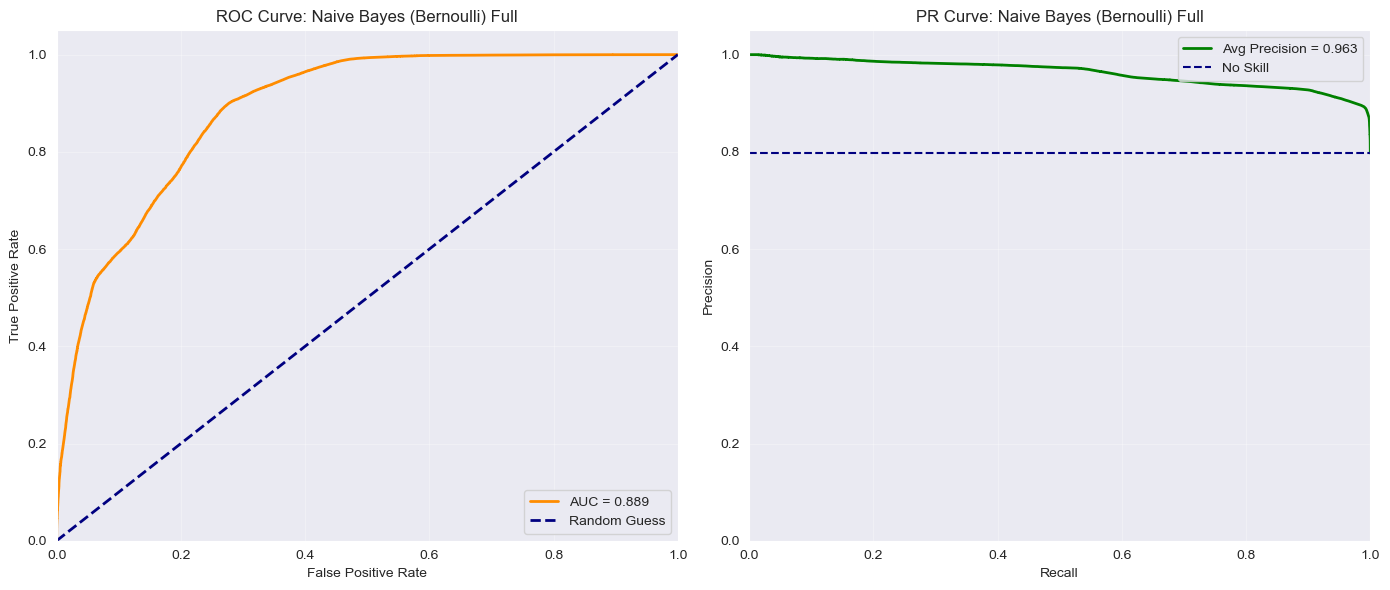

In [59]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gnb_cat = GaussianNB()
results.append(
    evaluate_and_graph(gnb_cat, X_train_cat, y_train, X_test_cat, y_test, "Naive Bayes (Gaussian) Cat", True)
)

gnb_full = GaussianNB()
results.append(
    evaluate_and_graph(gnb_full, X_train_full, y_train, X_test_full, y_test, "Naive Bayes (Gaussian) Full", True)
)

# ---

bnb_cat = BernoulliNB()
results.append(
    evaluate_and_graph(bnb_cat, X_train_cat, y_train, X_test_cat, y_test, "Naive Bayes (Bernoulli) Cat", True)
)

bnb_full = BernoulliNB()
results.append(
    evaluate_and_graph(bnb_full, X_train_full, y_train, X_test_full, y_test, "Naive Bayes (Bernoulli) Full", True)
)

# SVM (Linear, Polynomial, and RBF)

SVM can take a long time O(n^3) so I made mini datasets to train on

In [60]:
from sklearn.model_selection import train_test_split

X_train_mini_cat, _, y_train_mini_cat, _ = train_test_split(
    X_train_cat,
    y_train,
    train_size=10_000,
    stratify=y_train,
    random_state=42
)

X_test_mini_cat, _, y_test_mini_cat, _ = train_test_split(
    X_test_cat,
    y_test,
    train_size=10_000,
    stratify=y_test,
    random_state=42
)

X_train_mini_full, _, y_train_mini_full, _ = train_test_split(
    X_train_full,
    y_train,
    train_size=10_000,
    stratify=y_train,
    random_state=42
)

X_test_mini_full, _, y_test_mini_full, _ = train_test_split(
    X_test_full,
    y_test,
    train_size=10_000,
    stratify=y_test,
    random_state=42
)

print(X_train_mini_cat.shape, y_train_mini_cat.shape)
print(X_test_mini_cat.shape, y_test_mini_cat.shape)
print(X_train_mini_full.shape, y_train_mini_full.shape)
print(X_test_mini_full.shape, y_test_mini_full.shape)

(10000, 25) (10000,)
(10000, 25) (10000,)
(10000, 54) (10000,)
(10000, 54) (10000,)


--- SVM (Linear) Cat ---
Train Accuracy: 0.8311 | Train AUC: 0.9111
Test  Accuracy: 0.8606 | Test  AUC: 0.9037
✅ Model seems balanced
------------------------------


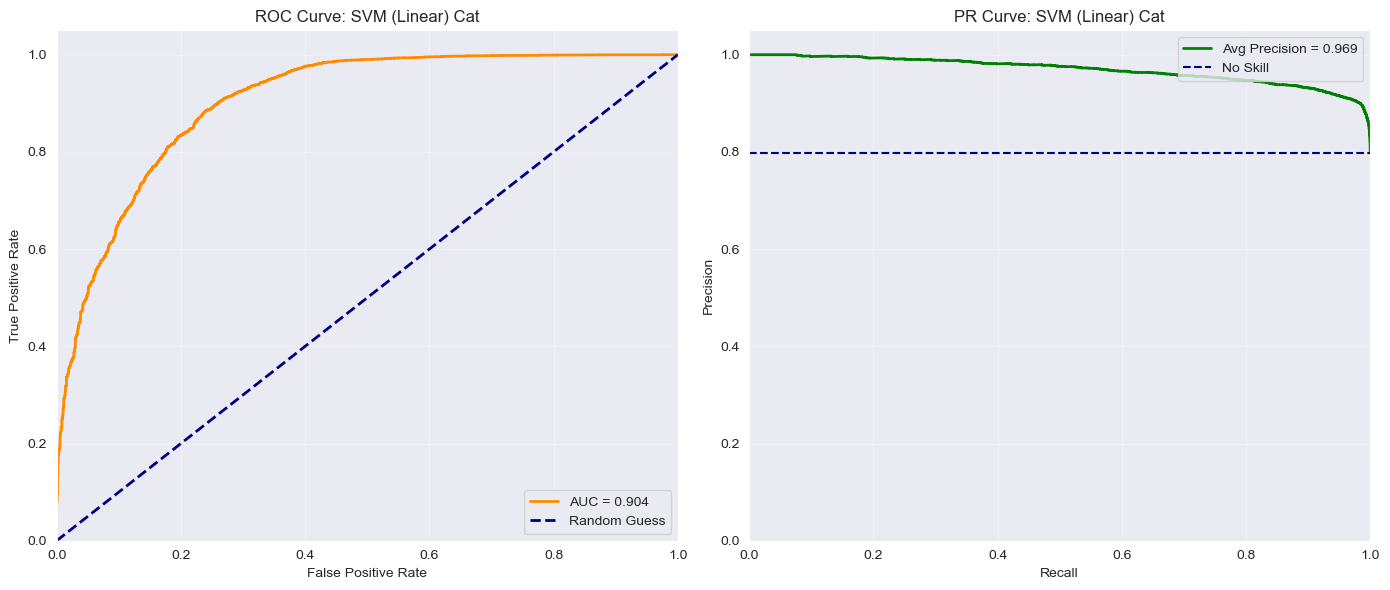

--- SVM (Linear) Full ---
Train Accuracy: 0.8335 | Train AUC: 0.9136
Test  Accuracy: 0.8604 | Test  AUC: 0.9039
✅ Model seems balanced
------------------------------


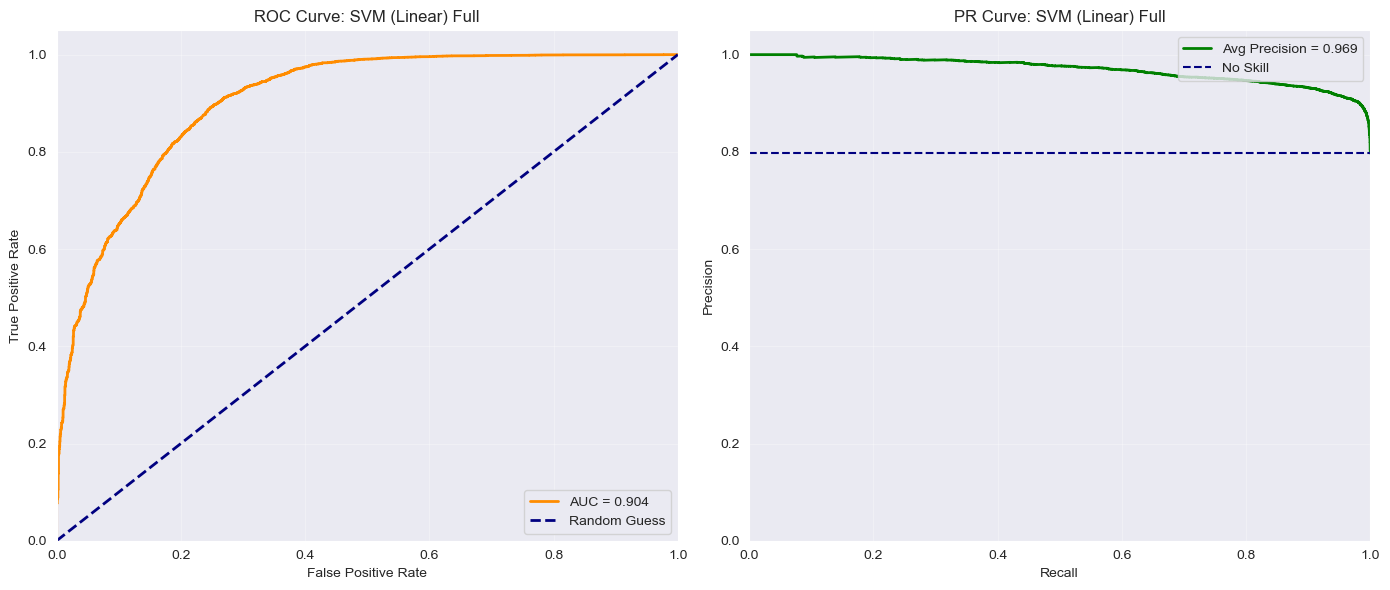

--- SVM (Polynomial) Cat ---
Train Accuracy: 0.8417 | Train AUC: 0.9164
Test  Accuracy: 0.8662 | Test  AUC: 0.8910
✅ Model seems balanced
------------------------------


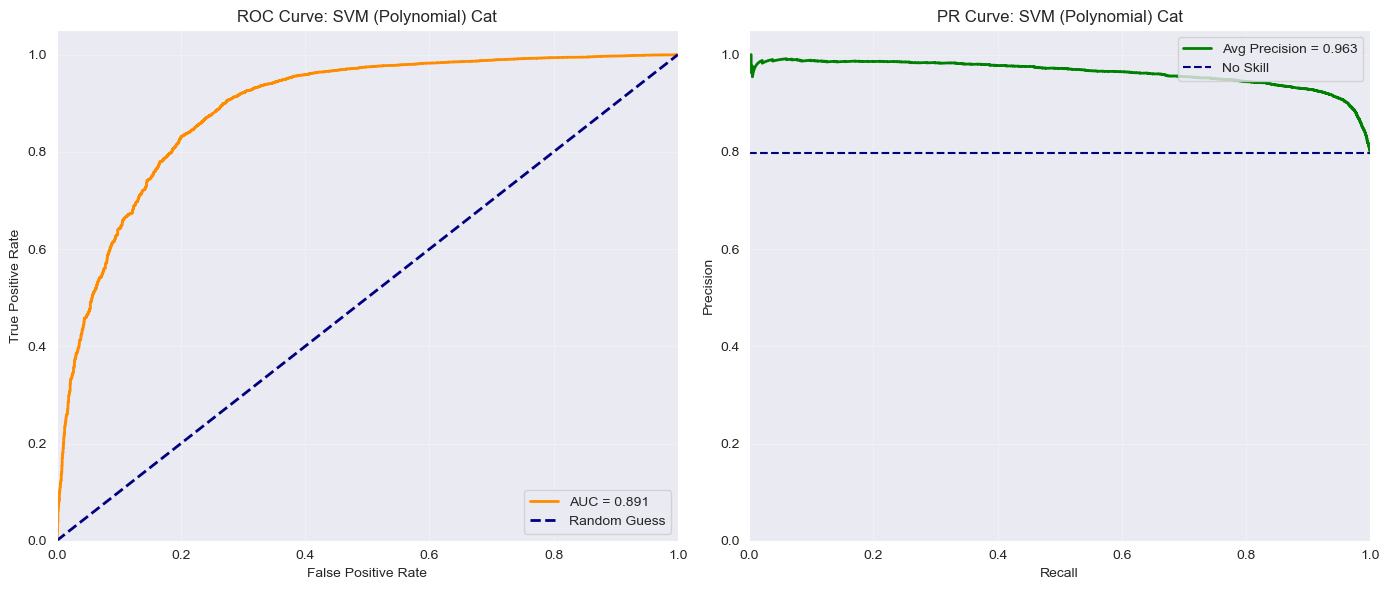

--- SVM (Polynomial) Full ---
Train Accuracy: 0.8569 | Train AUC: 0.9325
Test  Accuracy: 0.8595 | Test  AUC: 0.8856
✅ Model seems balanced
------------------------------


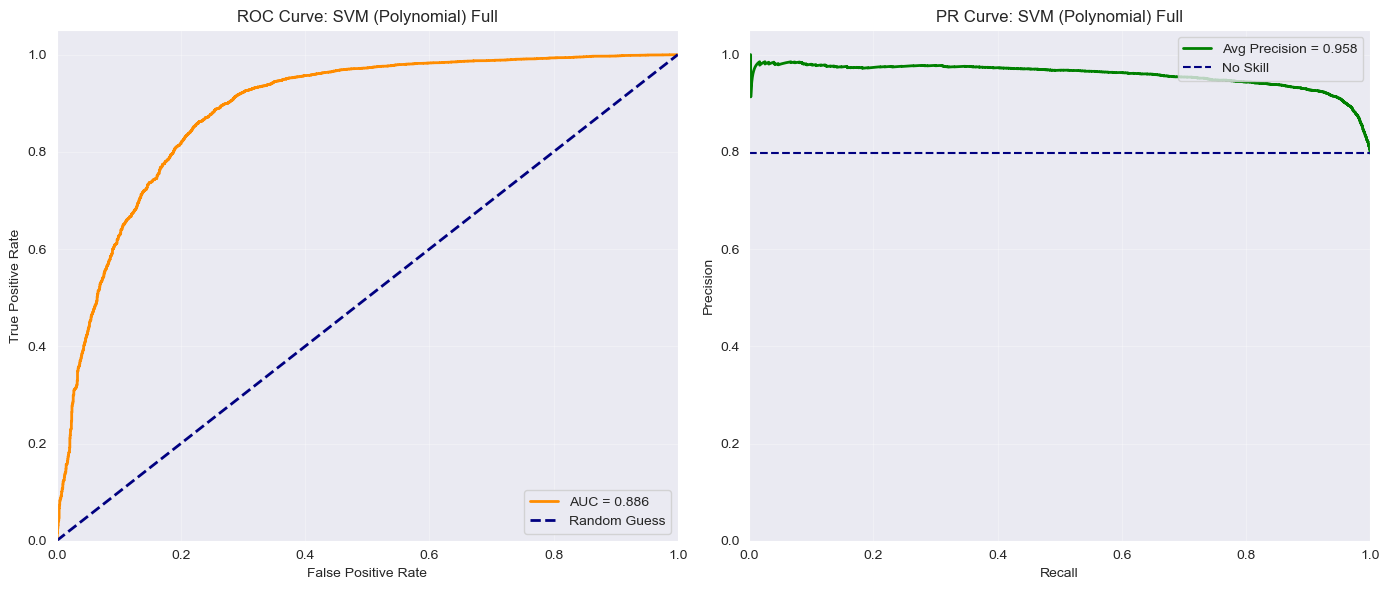

--- SVM (RBF) Cat ---
Train Accuracy: 0.8440 | Train AUC: 0.9226
Test  Accuracy: 0.8597 | Test  AUC: 0.8920
✅ Model seems balanced
------------------------------


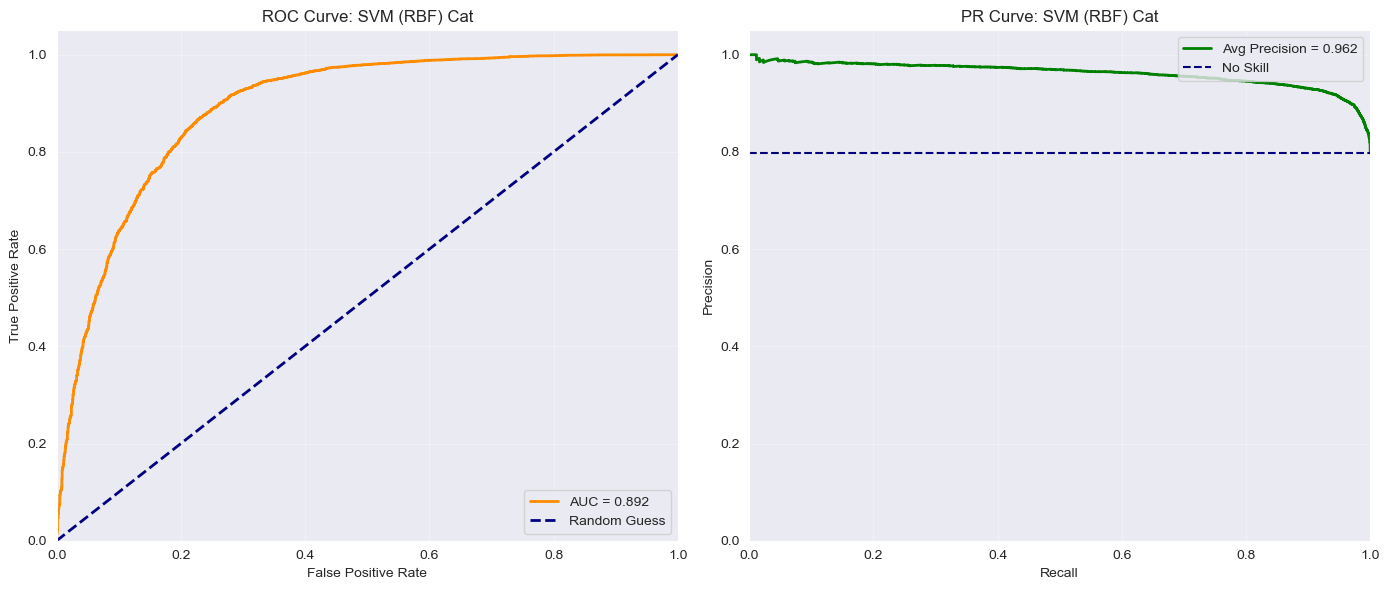

--- SVM (RBF) Full ---
Train Accuracy: 0.8519 | Train AUC: 0.9317
Test  Accuracy: 0.8597 | Test  AUC: 0.8893
✅ Model seems balanced
------------------------------


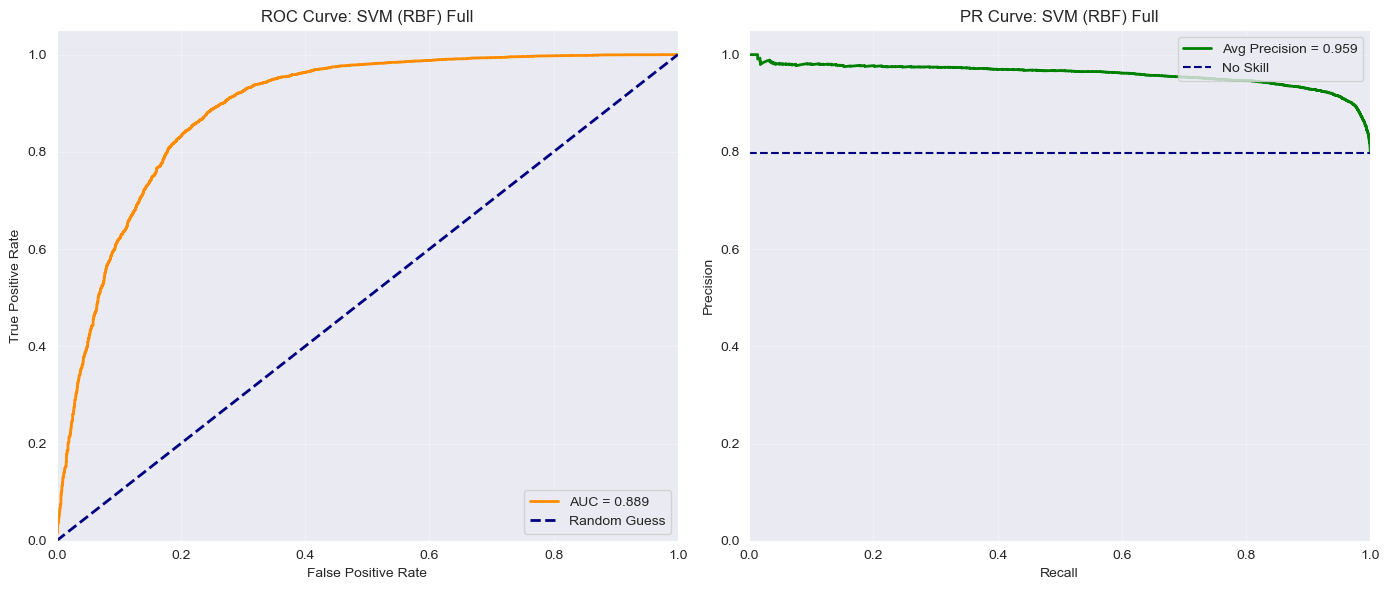

In [61]:
from sklearn.svm import SVC

svm_linear_cat = SVC(kernel='linear', probability=True, random_state=42)
results.append(
    evaluate_and_graph(svm_linear_cat, X_train_mini_cat, y_train_mini_cat, X_test_mini_cat, y_test_mini_cat, "SVM (Linear) Cat", True)
)

svm_linear_full = SVC(kernel='linear', probability=True, random_state=42)
results.append(
    evaluate_and_graph(svm_linear_full, X_train_mini_full, y_train_mini_full, X_test_mini_full, y_test_mini_full, "SVM (Linear) Full", True)
)

#---

svm_poly_cat = SVC(kernel='poly', degree=3, probability=True, random_state=42)
results.append(
    evaluate_and_graph(svm_poly_cat, X_train_mini_cat, y_train_mini_cat, X_test_mini_cat, y_test_mini_cat, "SVM (Polynomial) Cat", True)
)

svm_poly_full = SVC(kernel='poly', degree=3, probability=True, random_state=42)
results.append(
    evaluate_and_graph(svm_poly_full, X_train_mini_full, y_train_mini_full, X_test_mini_full, y_test_mini_full, "SVM (Polynomial) Full", True)
)

# ---

svm_rbf_cat = SVC(kernel='rbf', probability=True, random_state=42)
results.append(
    evaluate_and_graph(svm_rbf_cat, X_train_mini_cat, y_train_mini_cat, X_test_mini_cat, y_test_mini_cat, "SVM (RBF) Cat", True)
)

svm_rbf_full = SVC(kernel='rbf', probability=True, random_state=42)
results.append(
    evaluate_and_graph(svm_rbf_full, X_train_mini_full, y_train_mini_full, X_test_mini_full, y_test_mini_full, "SVM (RBF) Full", True)
)

# Decision Trees (Gini and Entropy)

--- Decision Tree (Gini) Cat ---
Train Accuracy: 0.8352 | Train AUC: 0.9172
Test  Accuracy: 0.8628 | Test  AUC: 0.9108
✅ Model seems balanced
------------------------------


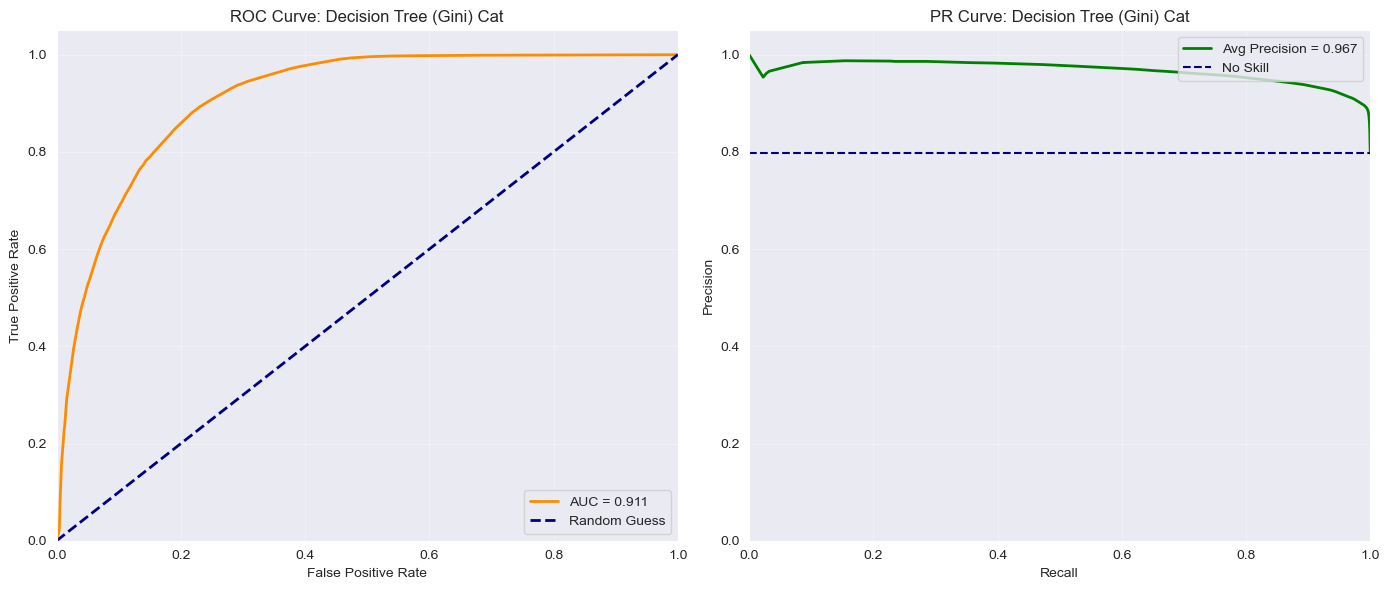

--- Decision Tree (Gini) Full ---
Train Accuracy: 0.8352 | Train AUC: 0.9171
Test  Accuracy: 0.8627 | Test  AUC: 0.9108
✅ Model seems balanced
------------------------------


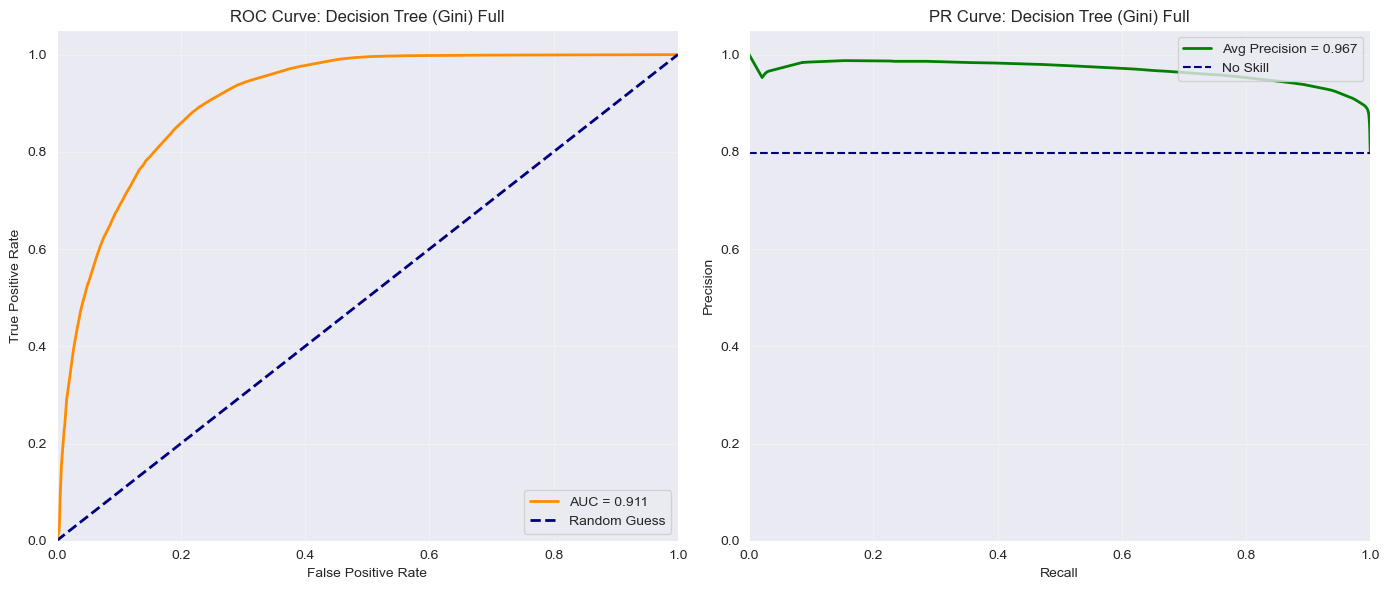

--- Decision Tree (Entropy) Cat ---
Train Accuracy: 0.8345 | Train AUC: 0.9168
Test  Accuracy: 0.8630 | Test  AUC: 0.9121
✅ Model seems balanced
------------------------------


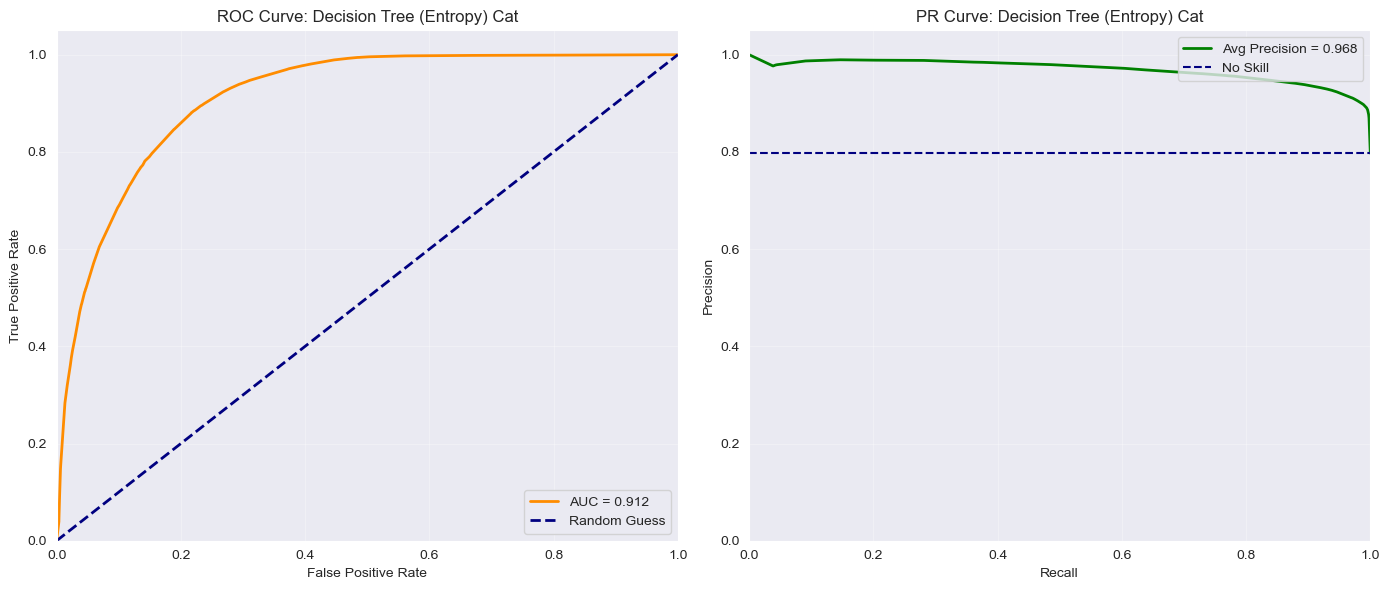

--- Decision Tree (Entropy) Full ---
Train Accuracy: 0.8346 | Train AUC: 0.9169
Test  Accuracy: 0.8633 | Test  AUC: 0.9120
✅ Model seems balanced
------------------------------


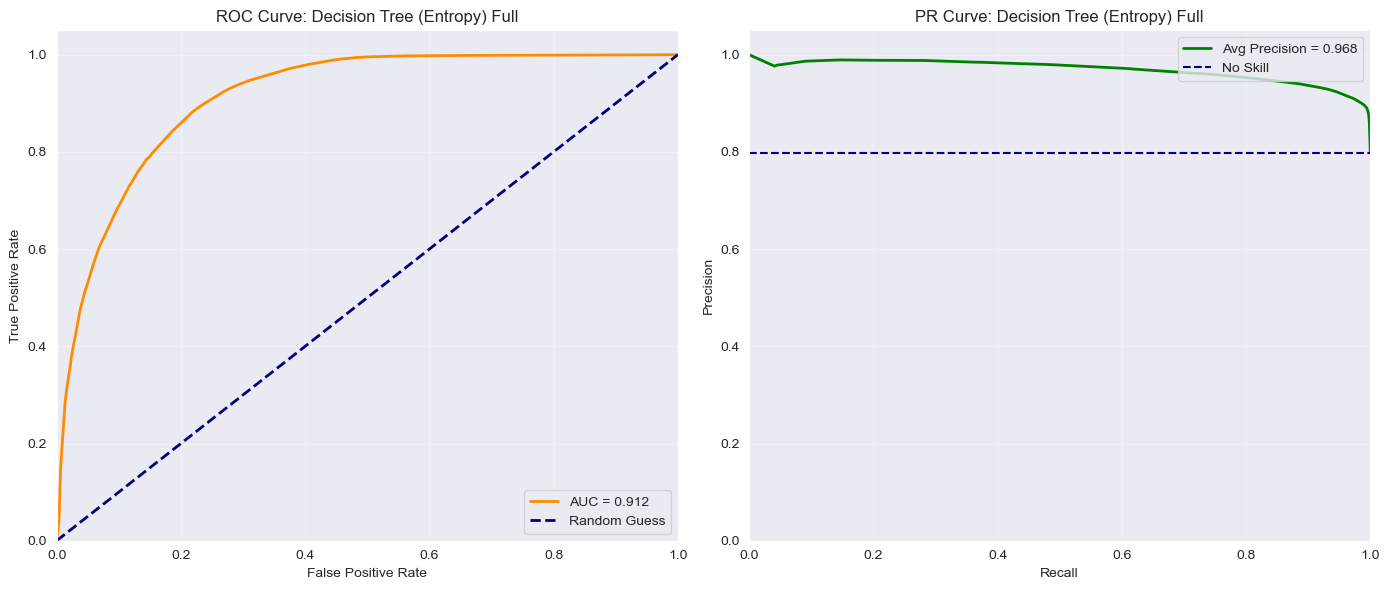

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt_gini_cat = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(dt_gini_cat, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Gini) Cat", True)
)

dt_gini_full = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(dt_gini_full, X_train_full, y_train, X_test_full, y_test, "Decision Tree (Gini) Full", True)
)

# ---

dt_entropy_cat = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(dt_entropy_cat, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Entropy) Cat", True)
)

dt_entropy_full = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(dt_entropy_full, X_train_full, y_train, X_test_full, y_test, "Decision Tree (Entropy) Full", True)
)

# Bagging

--- Bagging (Trees) Cat ---
Train Accuracy: 0.9999 | Train AUC: 1.0000
Test  Accuracy: 0.8965 | Test  AUC: 0.9029
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


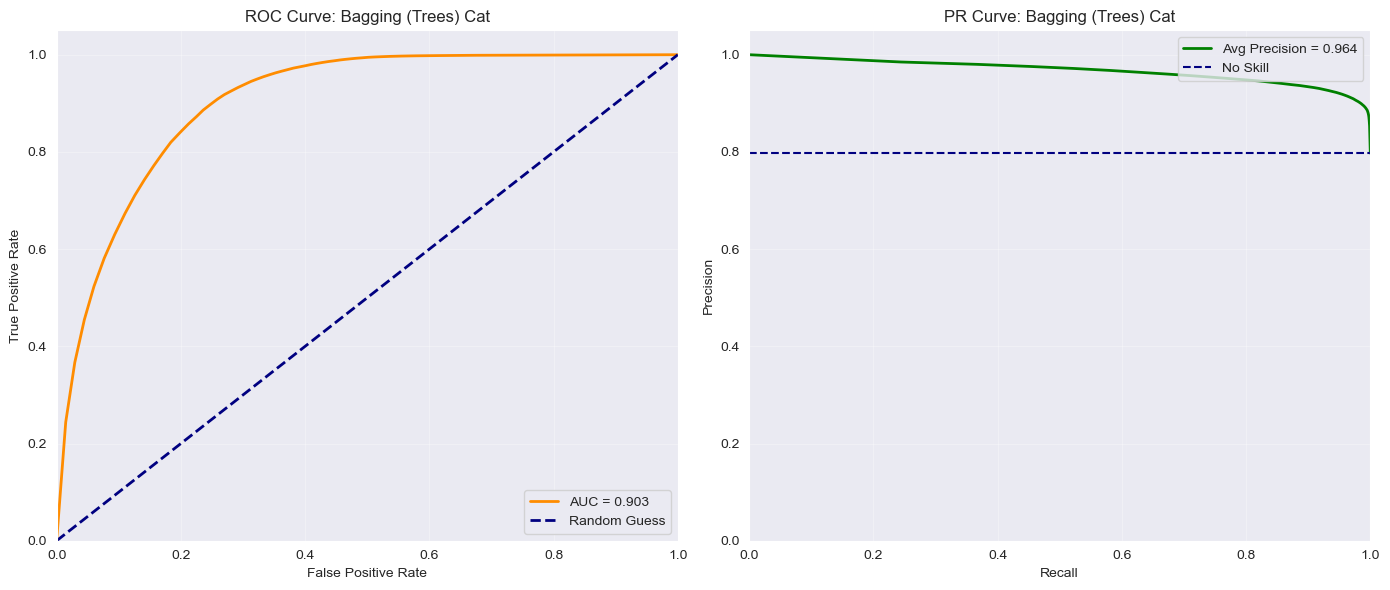

--- Bagging (Trees) Full ---
Train Accuracy: 0.9999 | Train AUC: 1.0000
Test  Accuracy: 0.8961 | Test  AUC: 0.9043
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


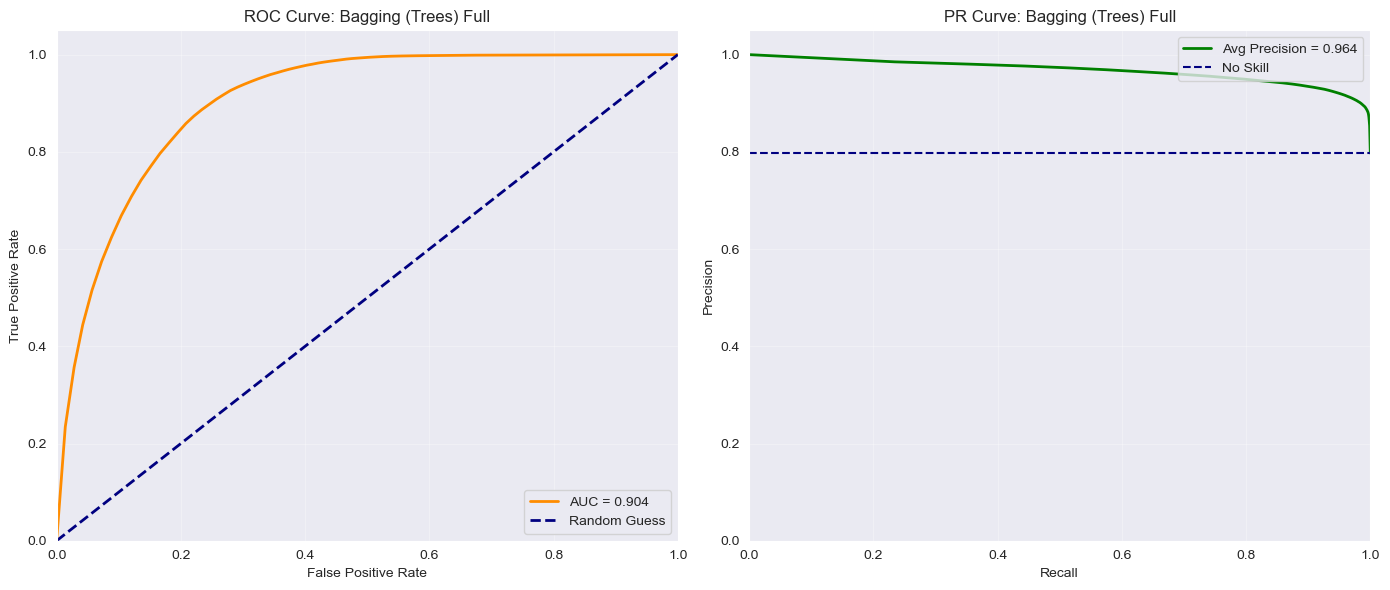

In [63]:
from sklearn.ensemble import BaggingClassifier

bagging_cat = BaggingClassifier(n_estimators=50, random_state=42)
results.append(
    evaluate_and_graph(bagging_cat, X_train_cat, y_train, X_test_cat, y_test, "Bagging (Trees) Cat", True)
)

bagging_full = BaggingClassifier(n_estimators=50, random_state=42)
results.append(
    evaluate_and_graph(bagging_full, X_train_full, y_train, X_test_full, y_test, "Bagging (Trees) Full", True)
)

# Random Forest Classifier Model

--- Random Forest Cat ---
Train Accuracy: 0.8321 | Train AUC: 0.9155
Test  Accuracy: 0.8699 | Test  AUC: 0.9130
✅ Model seems balanced
------------------------------


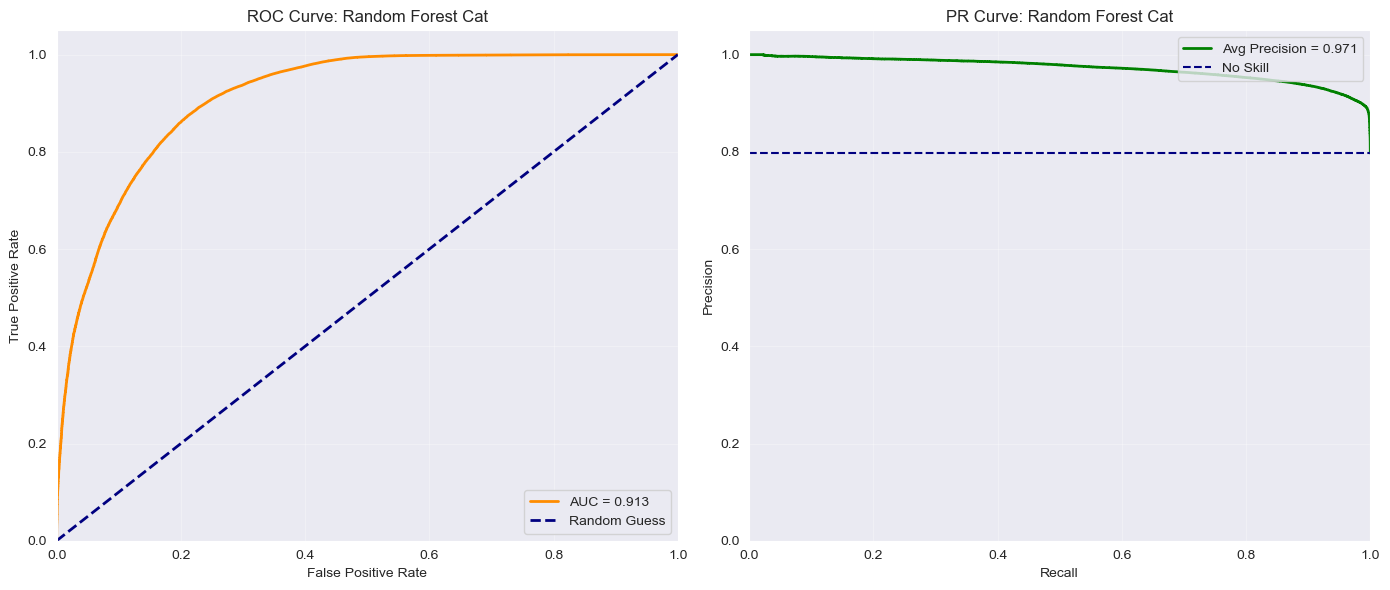

--- Random Forest Full ---
Train Accuracy: 0.8290 | Train AUC: 0.9132
Test  Accuracy: 0.8671 | Test  AUC: 0.9114
✅ Model seems balanced
------------------------------


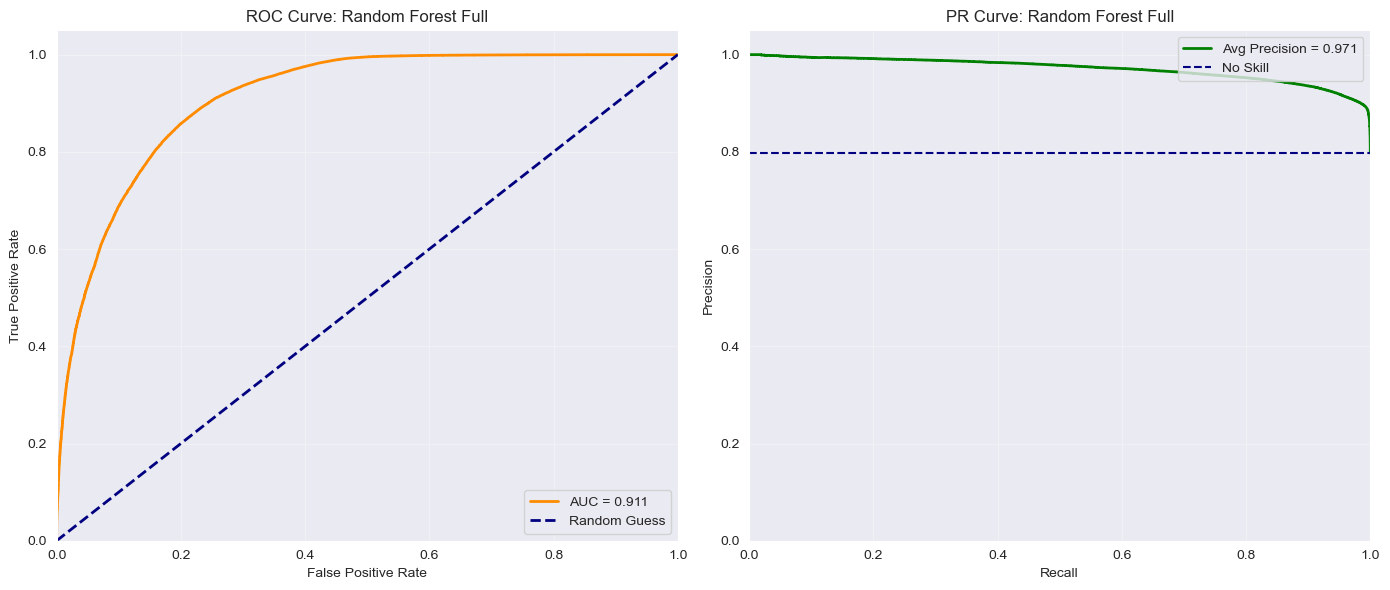

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_cat = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(rf_cat, X_train_cat, y_train, X_test_cat, y_test, "Random Forest Cat", True)
)

rf_full = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(rf_full, X_train_full, y_train, X_test_full, y_test, "Random Forest Full", True)
)

# Gradient Boosting Classifier Model

--- Gradient Boosting Cat ---
Train Accuracy: 0.8329 | Train AUC: 0.9155
Test  Accuracy: 0.8620 | Test  AUC: 0.9164
✅ Model seems balanced
------------------------------


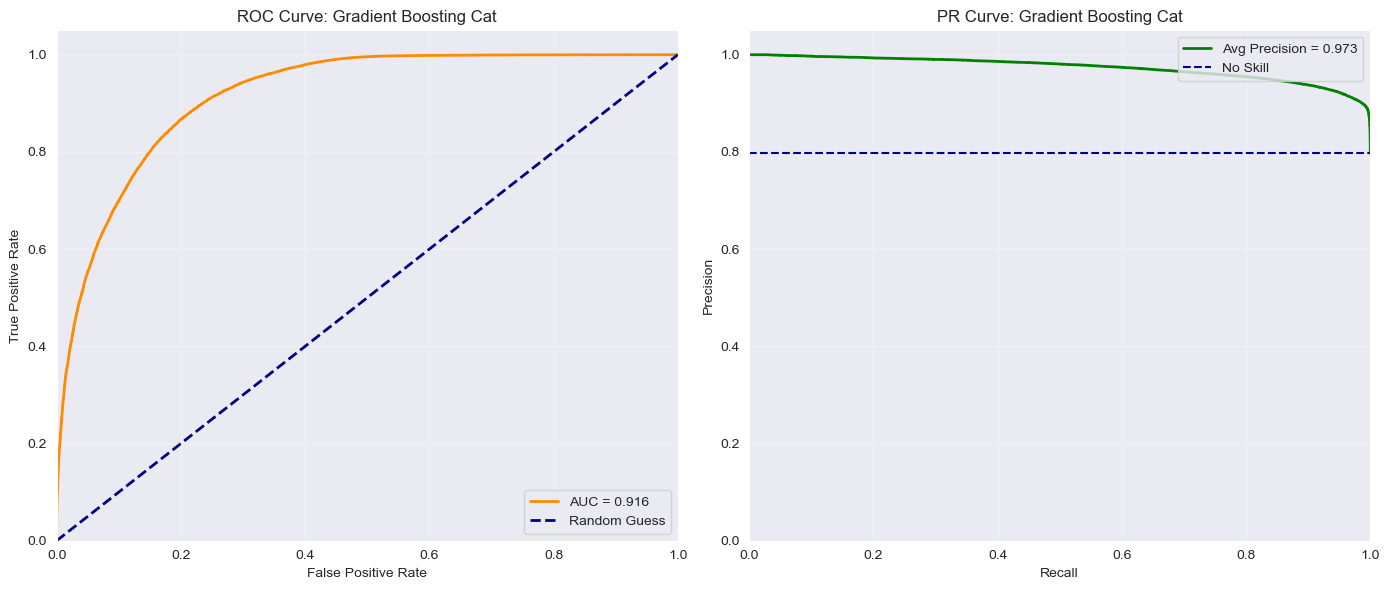

--- Gradient Boosting Full ---
Train Accuracy: 0.8329 | Train AUC: 0.9155
Test  Accuracy: 0.8622 | Test  AUC: 0.9164
✅ Model seems balanced
------------------------------


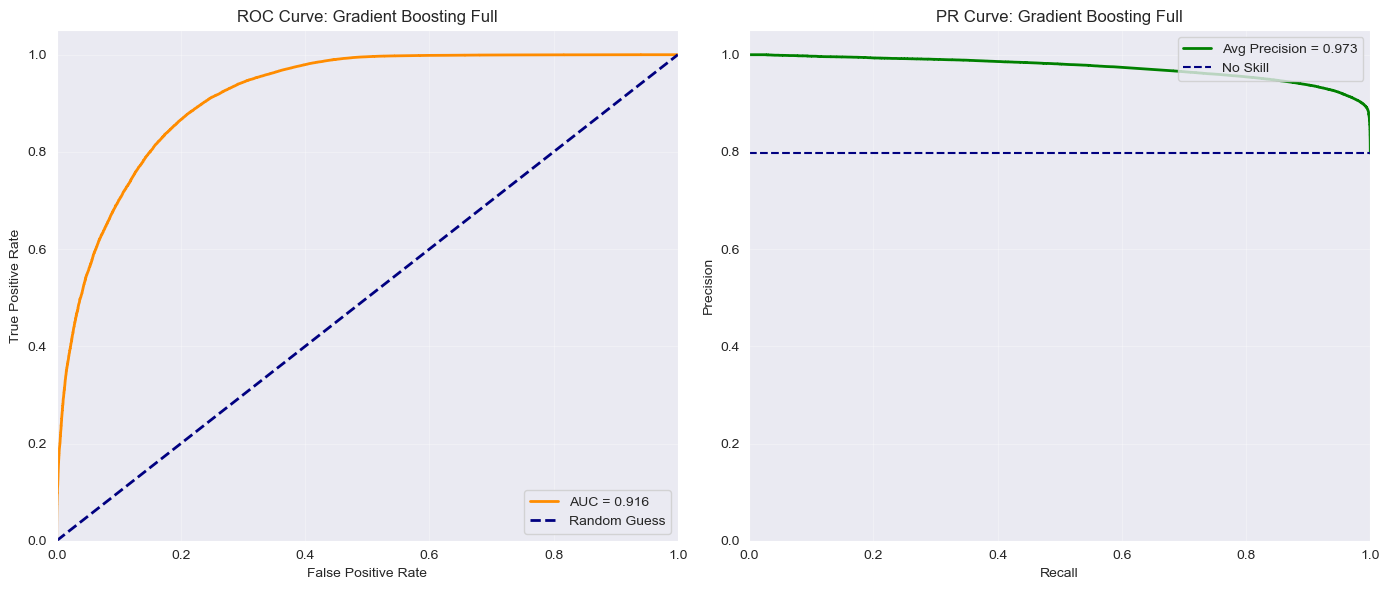

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gb_cat = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
results.append(
    evaluate_and_graph(gb_cat, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting Cat", True)
)

gb_full = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
results.append(
    evaluate_and_graph(gb_full, X_train_full, y_train, X_test_full, y_test, "Gradient Boosting Full", True)
)

# PCA + LR/Random Forest/SVM

In [66]:
from sklearn.decomposition import PCA

pca_cat = PCA(n_components=0.95, random_state=42)

# --- PCA on CAT features (full train/test) ---

X_train_pca_cat = pca_cat.fit_transform(X_train_cat)
X_test_pca_cat = pca_cat.transform(X_test_cat)

print(f"[CAT] Original feature count: {X_train_cat.shape[1]}")
print(f"[CAT] Reduced feature count:  {X_train_pca_cat.shape[1]}")

# --- PCA on FULL features (full train/test) ---

pca_full = PCA(n_components=0.95, random_state=42)

X_train_pca_full = pca_full.fit_transform(X_train_full)
X_test_pca_full = pca_full.transform(X_test_full)

print(f"[FULL] Original feature count: {X_train_full.shape[1]}")
print(f"[FULL] Reduced feature count:  {X_train_pca_full.shape[1]}")

[CAT] Original feature count: 25
[CAT] Reduced feature count:  13
[FULL] Original feature count: 54
[FULL] Reduced feature count:  26


--- PCA + Logistic Regression Cat ---
Train Accuracy: 0.8030 | Train AUC: 0.8884
Test  Accuracy: 0.8403 | Test  AUC: 0.8898
✅ Model seems balanced
------------------------------


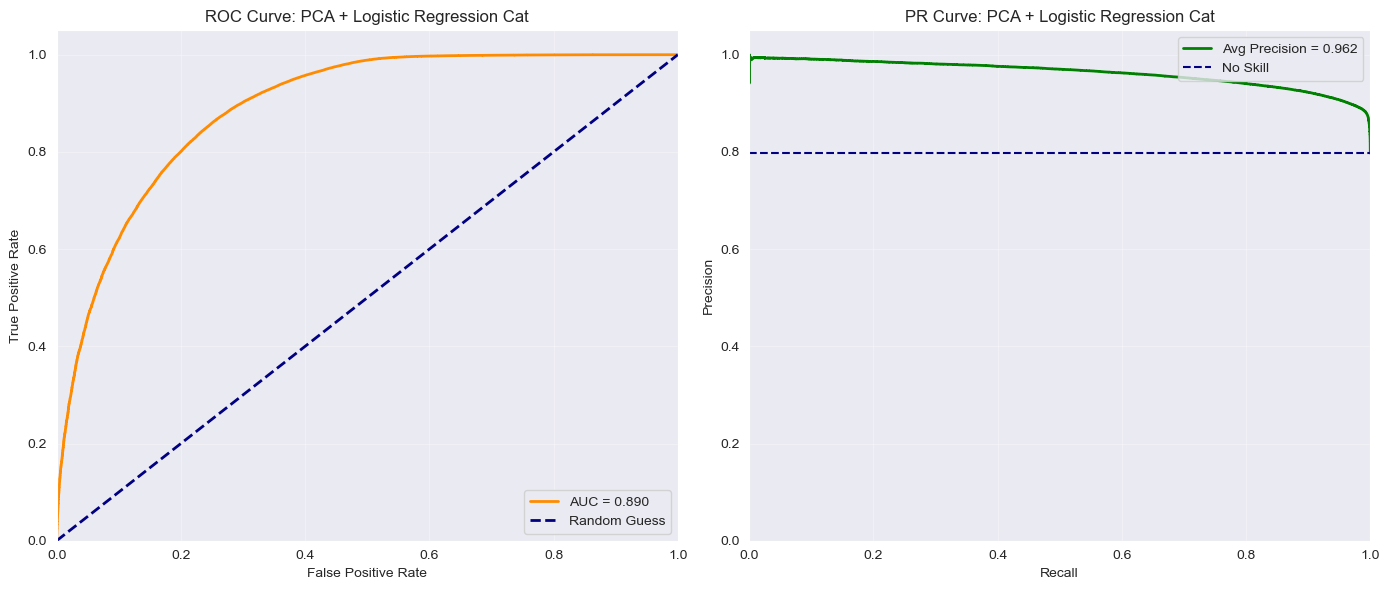

--- PCA + Logistic Regression Full ---
Train Accuracy: 0.8038 | Train AUC: 0.8895
Test  Accuracy: 0.8417 | Test  AUC: 0.8908
✅ Model seems balanced
------------------------------


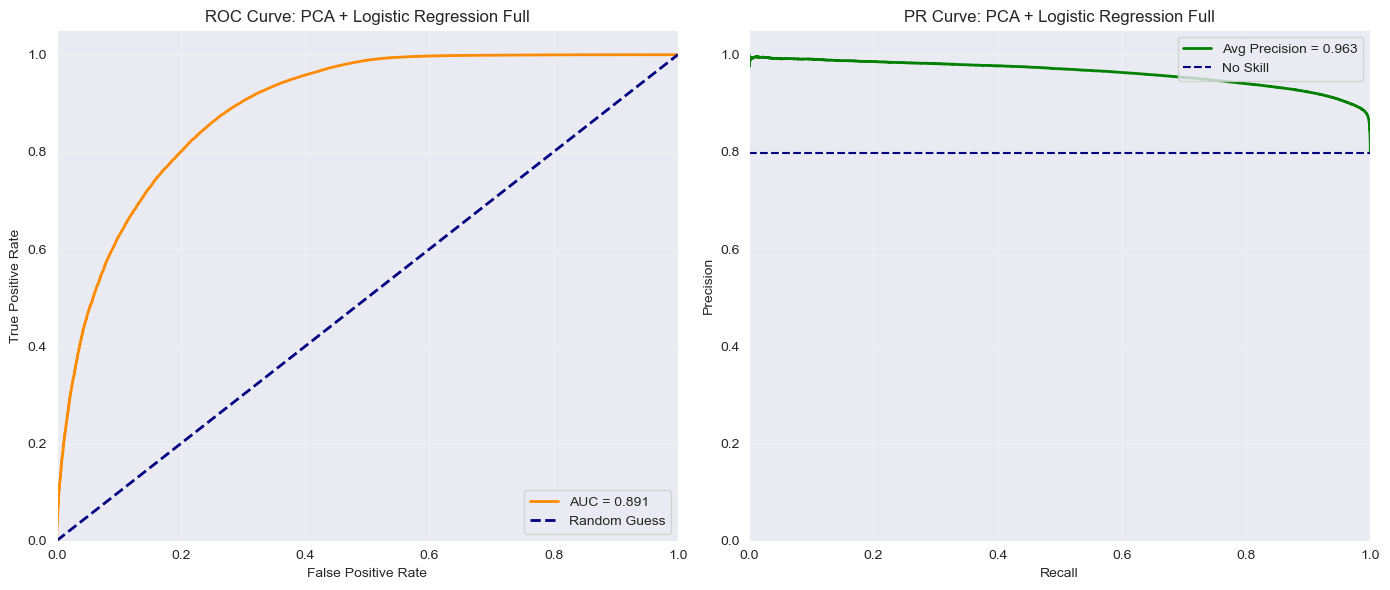

--- PCA + Random Forest Cat ---
Train Accuracy: 0.8216 | Train AUC: 0.9069
Test  Accuracy: 0.8557 | Test  AUC: 0.8982
✅ Model seems balanced
------------------------------


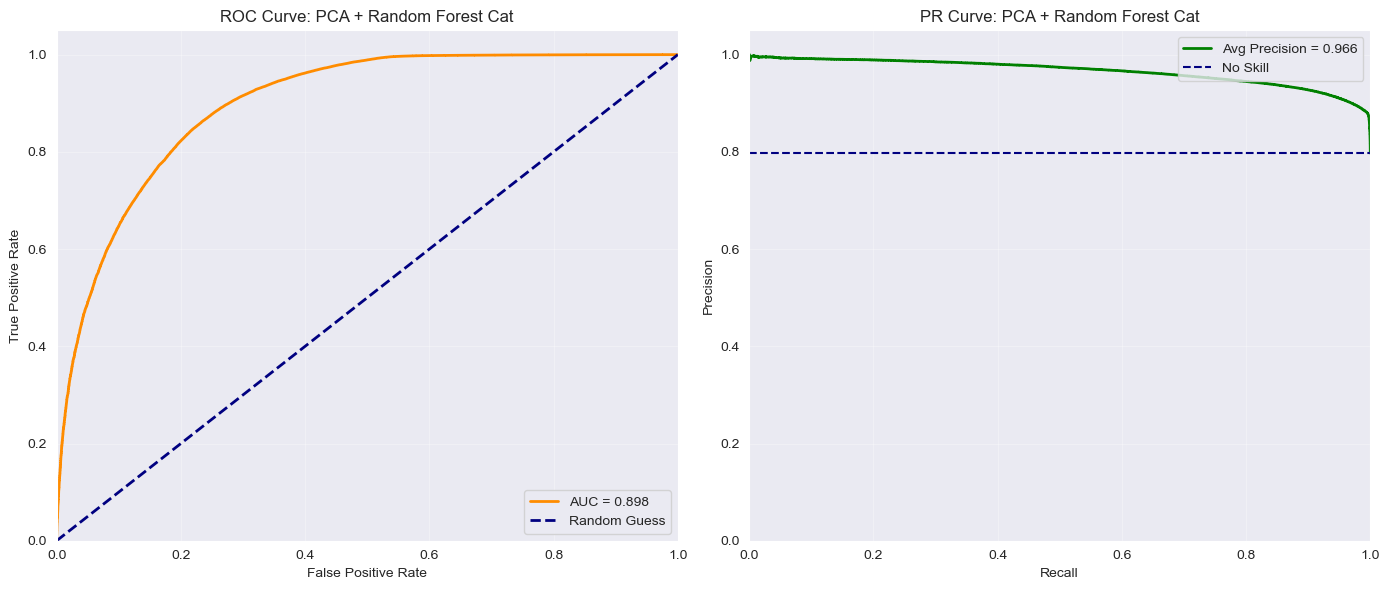

--- PCA + Random Forest Full ---
Train Accuracy: 0.8325 | Train AUC: 0.9146
Test  Accuracy: 0.8659 | Test  AUC: 0.9059
✅ Model seems balanced
------------------------------


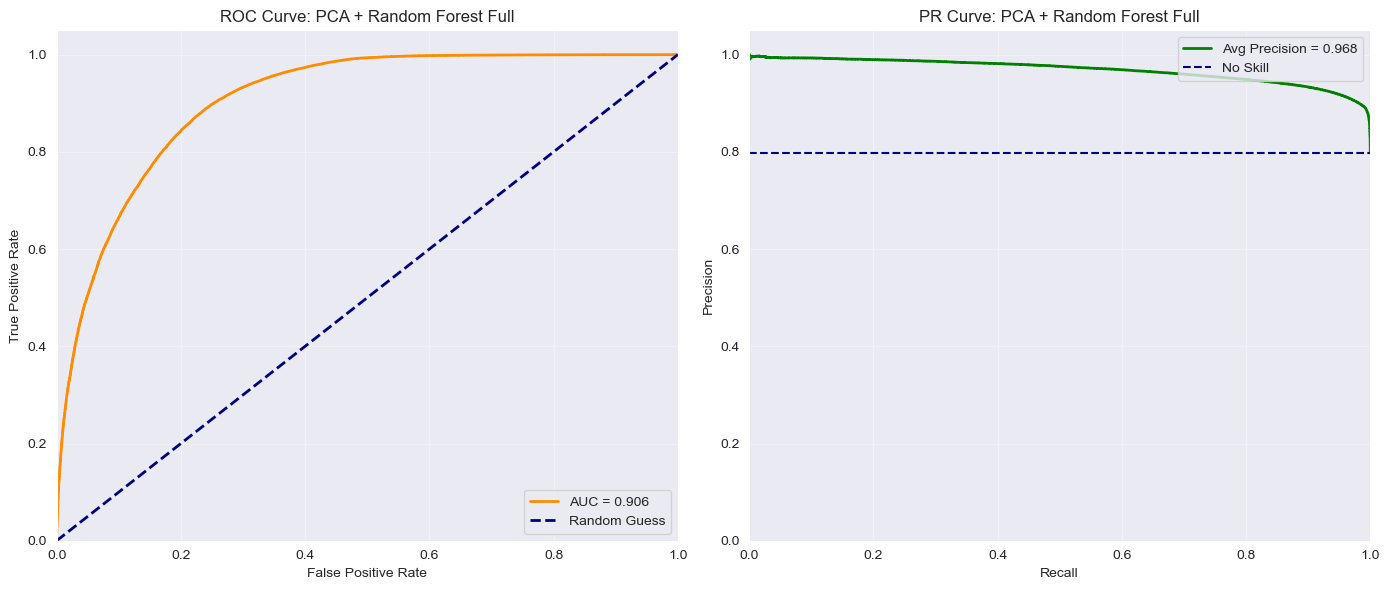

In [67]:
lr_pca_cat = LogisticRegression(max_iter=1000, random_state=42)
results.append(
    evaluate_and_graph(lr_pca_cat, X_train_pca_cat, y_train, X_test_pca_cat, y_test, "PCA + Logistic Regression Cat", True)
)

lr_pca_full = LogisticRegression(max_iter=1000, random_state=42)
results.append(
    evaluate_and_graph(lr_pca_full, X_train_pca_full, y_train, X_test_pca_full, y_test, "PCA + Logistic Regression Full", True)
)

# ---

rf_pca_cat = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(rf_pca_cat, X_train_pca_cat, y_train, X_test_pca_cat, y_test, "PCA + Random Forest Cat", True)
)

rf_pca_full = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(rf_pca_full, X_train_pca_full, y_train, X_test_pca_full, y_test, "PCA + Random Forest Full", True)
)

In [68]:
# --- PCA on CAT mini for SVM ---

pca_cat_mini = PCA(n_components=0.95, random_state=42)

X_train_pca_cat_mini = pca_cat_mini.fit_transform(X_train_mini_cat)
X_test_pca_cat_mini  = pca_cat_mini.transform(X_test_mini_cat)

print(f"[CAT mini] Reduced dims: {X_train_pca_cat_mini.shape[1]}")

# --- PCA on FULL mini for SVM ---

pca_full_mini = PCA(n_components=0.95, random_state=42)

X_train_pca_full_mini = pca_full_mini.fit_transform(X_train_mini_full)
X_test_pca_full_mini  = pca_full_mini.transform(X_test_mini_full)

print(f"[FULL mini] Reduced dims: {X_train_pca_full_mini.shape[1]}")

[CAT mini] Reduced dims: 13
[FULL mini] Reduced dims: 26


--- PCA + SVM (RBF) Cat ---
Train Accuracy: 0.8258 | Train AUC: 0.8998
Test  Accuracy: 0.8449 | Test  AUC: 0.8761
✅ Model seems balanced
------------------------------


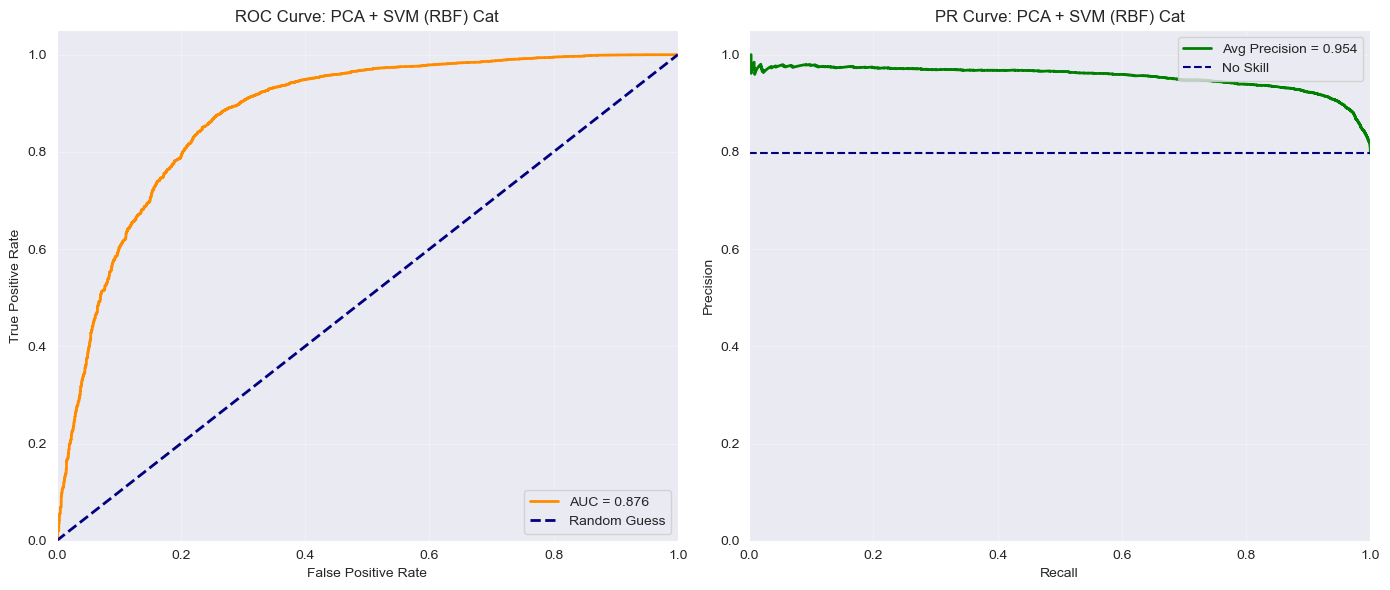

--- PCA + SVM (RBF) Full ---
Train Accuracy: 0.8375 | Train AUC: 0.9212
Test  Accuracy: 0.8443 | Test  AUC: 0.8773
✅ Model seems balanced
------------------------------


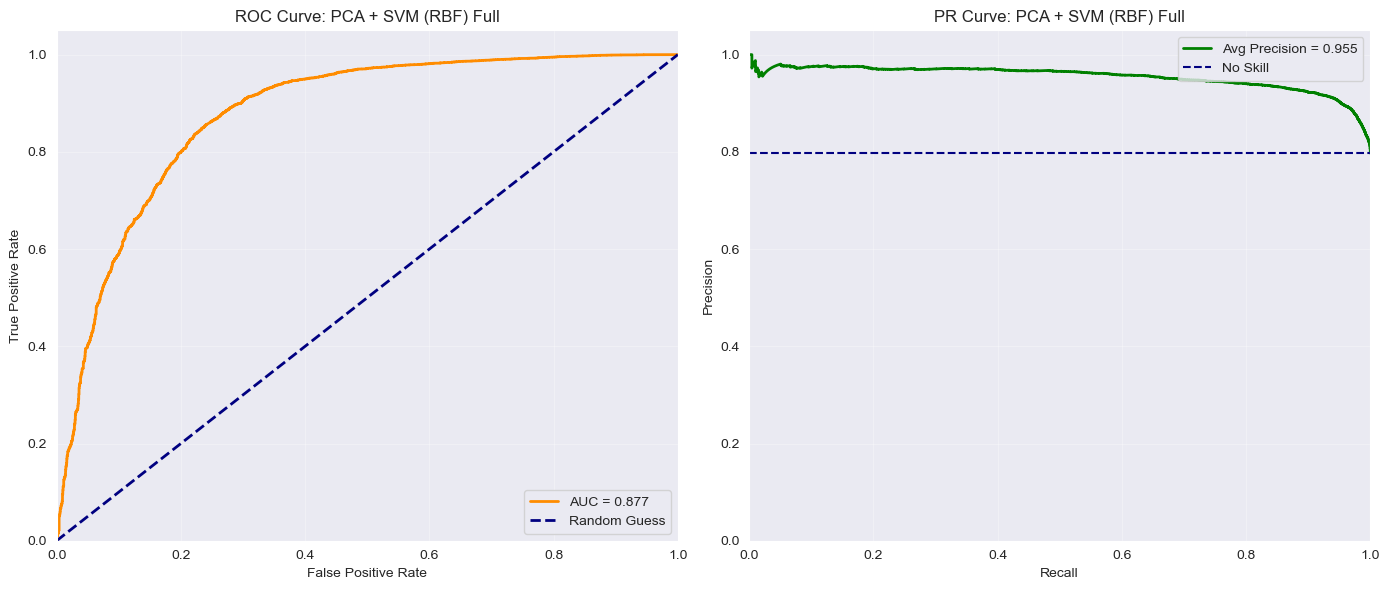

In [69]:
svm_pca_cat = SVC(kernel='rbf', probability=True, random_state=42)
results.append(
    evaluate_and_graph(svm_pca_cat, X_train_pca_cat_mini, y_train_mini_cat, X_test_pca_cat_mini, y_test_mini_cat, "PCA + SVM (RBF) Cat", True)
)

svm_pca_full = SVC(kernel='rbf', probability=True, random_state=42)
results.append(
    evaluate_and_graph(svm_pca_full, X_train_pca_full_mini, y_train_mini_full, X_test_pca_full_mini, y_test_mini_full, "PCA + SVM (RBF) Full", True)
)

# Results

In [70]:
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame(results))

model  accuracy       auc  average_precision  \
0                          PLA Cat  0.674235  0.851725           0.952492   
1                         PLA Full  0.881172  0.847820           0.942506   
2          Logistic Regression Cat  0.861380  0.911180           0.971131   
3         Logistic Regression Full  0.863013  0.911734           0.971320   
4           Softmax Regression Cat  0.861363  0.911185           0.971133   
5           Softmax Regression Cat  0.863013  0.911726           0.971319   
6                          LDA Cat  0.881402  0.910678           0.970862   
7                         LDA Full  0.882603  0.911248           0.971096   
8                          QDA Cat  0.873467  0.904593           0.968185   
9                         QDA Full  0.849915  0.901512           0.967447   
10      Naive Bayes (Gaussian) Cat  0.827709  0.873282           0.949272   
11     Naive Bayes (Gaussian) Full  0.684628  0.866781           0.951344   
12     Naive Bayes (Bernoulli) Cat  0.851677  0.890707           0.961943   
13    Naive Bayes (Bernoulli) Full  0.775751  0.888584           0.962546   
14                SVM (Linear) Cat  0.860600  0.903656           0.968957   
15               SVM (Linear) Full  0.860400  0.903901           0.969047   
16            SVM (Polynomial) Cat  0.866200  0.890995           0.962828   
17           SVM (Polynomial) Full  0.859500  0.885580           0.958490   
18                   SVM (RBF) Cat  0.859700  0.892035           0.961763   
19                  SVM (RBF) Full  0.859700  0.889252           0.959460   
20        Decision Tree (Gini) Cat  0.862777  0.910797           0.966890   
21       Decision Tree (Gini) Full  0.862727  0.910838           0.966935   
22     Decision Tree (Entropy) Cat  0.862979  0.912071           0.968335   
23    Decision Tree (Entropy) Full  0.863265  0.911961           0.968231   
24             Bagging (Trees) Cat  0.896453  0.902929           0.963976   
25            Bagging (Trees) Full  0.896066  0.904318           0.964472   
26               Random Forest Cat  0.869887  0.913046           0.971489   
27              Random Forest Full  0.867092  0.911447           0.970863   
28           Gradient Boosting Cat  0.861997  0.916442           0.973057   
29          Gradient Boosting Full  0.862244  0.916409           0.973046   
30   PCA + Logistic Regression Cat  0.840285  0.889799           0.962455   
31  PCA + Logistic Regression Full  0.841728  0.890829           0.962816   
32         PCA + Random Forest Cat  0.855650  0.898172           0.965919   
33        PCA + Random Forest Full  0.865936  0.905882           0.968328   
34             PCA + SVM (RBF) Cat  0.844900  0.876130           0.954427   
35            PCA + SVM (RBF) Full  0.844300  0.877257           0.954573   

    train_accuracy  train_auc  
0         0.747231   0.850494  
1         0.779425   0.847497  
2         0.825871   0.909799  
3         0.826918   0.910519  
4         0.825867   0.909802  
5         0.826875   0.910515  
6         0.819219   0.909305  
7         0.821676   0.910064  
8         0.822952   0.903518  
9         0.819823   0.900762  
10        0.806942   0.873921  
11        0.755826   0.866372  
12        0.812202   0.890056  
13        0.783879   0.887951  
14        0.831100   0.911126  
15        0.833500   0.913562  
16        0.841700   0.916406  
17        0.856900   0.932495  
18        0.844000   0.922648  
19        0.851900   0.931666  
20        0.835171   0.917172  
21        0.835161   0.917130  
22        0.834453   0.916846  
23        0.834597   0.916887  
24        0.999941   1.000000  
25        0.999940   1.000000  
26        0.832075   0.915454  
27        0.829032   0.913170  
28        0.832913   0.915521  
29        0.832907   0.915507  
30        0.802993   0.888438  
31        0.803816   0.889549  
32        0.821554   0.906920  
33        0.832499   0.914554  
34        0.825800   0.899845  
35        0.837500   0.9211

A striking pattern in the results table is how consistently similar the Cat models (without `grade_subgrade`) and the Full models (with `grade_subgrade`) perform. Across virtually every model family—Logistic Regression, SVM, Naive Bayes, Decision Trees, Random Forests, and Gradient Boosting—the difference between Cat and Full versions is typically:
- Accuracy: difference of 0.000–0.003
- AUC: difference of 0.000–0.004
- Average Precision: difference of 0.000–0.005

These differences are so small they fall within typical random variation, meaning that adding `grade_subgrade` does not meaningfully improve model performance.

Example patterns from the table
- Gradient Boosting Cat (no `grade_subgrade`) is actually the best-performing model overall
- Logistic Regression Cat and Full differ by only ~0.001 across all metrics
- SVM (RBF) Cat vs Full shows almost identical performance
- Decision Tree Cat vs Full matches to 3–4 decimal places
- Random Forest Cat and Full are also nearly indistinguishable

This consistency across all model classes strongly suggests that grade_subgrade is not a predictive driver in this problem—even models that usually overfit to noisy features (like trees) do not extract meaningful signal from it.




The results table shows that the Cat and Full versions of every model perform nearly identically, with differences typically under 0.003 across accuracy, AUC, and average precision. Because the only difference between these models is the inclusion of the `grade_subgrade` feature, this strongly suggests that `grade_subgrade` adds little or no predictive value. This conclusion is further supported by the fact that the best-performing model overall—Gradient Boosting Cat—excludes `grade_subgrade` entirely.

When comparing model families, Gradient Boosting Cat leads across all metrics, but only marginally (≈0.001–0.01) above simpler models like Logistic Regression. This indicates that the dataset is close to linearly separable and that additional model complexity yields minimal improvements. Tree-based models and PCA-enhanced models show similar performance clusters, reinforcing that the core features already contain the primary signal needed for prediction.

In [71]:
def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    df['overfitting_gap'] = df['train_auc'] - df['auc']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[df['is_overfit'] == False].copy()
    df_overfit = df[df['is_overfit'] == True].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ The following models were disqualified due to overfitting:")
        display(df_overfit[['model', 'accuracy', 'auc', 'train_auc', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models are overfitting (by the chosen threshold).")
        print("Falling back to ranking ALL models by AUC.")
        df_valid = df.copy()

    print("Best by Accuracy:")
    display(df_valid.sort_values(by="accuracy", ascending=False).head(1))

    print("Best by AUC:")
    display(df_valid.sort_values(by="auc", ascending=False).head(1))

    print("Best by Average Precision:")
    display(df_valid.sort_values(by="average_precision", ascending=False).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_acc"] = df_valid["accuracy"].rank(ascending=False)
    df_valid_ranked["rank_auc"] = df_valid["auc"].rank(ascending=False)
    df_valid_ranked["rank_ap"] = df_valid["average_precision"].rank(ascending=False)


    final_ranking = df_valid_ranked.sort_values(
        by=["rank_auc", "rank_acc", "rank_ap"]
    )

    cols = ['model', 'accuracy', 'auc', 'average_precision', 'overfitting_gap']
    print("\nFinal ranking (higher = better):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best model: {best_model_name}")

    return best_model_name

In [72]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 36
Valid Models: 34
Disqualified Models: 2

⚠️ The following models were disqualified due to overfitting:


model  accuracy       auc  train_auc  overfitting_gap
24   Bagging (Trees) Cat  0.896453  0.902929        1.0         0.097071
25  Bagging (Trees) Full  0.896066  0.904318        1.0         0.095682

Best by Accuracy:


model  accuracy       auc  average_precision  train_accuracy  train_auc  \
7  LDA Full  0.882603  0.911248           0.971096        0.821676   0.910064   

   overfitting_gap  is_overfit  
7        -0.001184       False

Best by AUC:


model  accuracy       auc  average_precision  \
28  Gradient Boosting Cat  0.861997  0.916442           0.973057   

    train_accuracy  train_auc  overfitting_gap  is_overfit  
28        0.832913   0.915521        -0.000921       False

Best by Average Precision:


model  accuracy       auc  average_precision  \
28  Gradient Boosting Cat  0.861997  0.916442           0.973057   

    train_accuracy  train_auc  overfitting_gap  is_overfit  
28        0.832913   0.915521        -0.000921       False


Final ranking (higher = better):


model  accuracy       auc  average_precision  \
28           Gradient Boosting Cat  0.861997  0.916442           0.973057   
29          Gradient Boosting Full  0.862244  0.916409           0.973046   
26               Random Forest Cat  0.869887  0.913046           0.971489   
22     Decision Tree (Entropy) Cat  0.862979  0.912071           0.968335   
23    Decision Tree (Entropy) Full  0.863265  0.911961           0.968231   
3         Logistic Regression Full  0.863013  0.911734           0.971320   
5           Softmax Regression Cat  0.863013  0.911726           0.971319   
27              Random Forest Full  0.867092  0.911447           0.970863   
7                         LDA Full  0.882603  0.911248           0.971096   
4           Softmax Regression Cat  0.861363  0.911185           0.971133   
2          Logistic Regression Cat  0.861380  0.911180           0.971131   
21       Decision Tree (Gini) Full  0.862727  0.910838           0.966935   
20        Decision Tree (Gini) Cat  0.862777  0.910797           0.966890   
6                          LDA Cat  0.881402  0.910678           0.970862   
33        PCA + Random Forest Full  0.865936  0.905882           0.968328   
8                          QDA Cat  0.873467  0.904593           0.968185   
15               SVM (Linear) Full  0.860400  0.903901           0.969047   
14                SVM (Linear) Cat  0.860600  0.903656           0.968957   
9                         QDA Full  0.849915  0.901512           0.967447   
32         PCA + Random Forest Cat  0.855650  0.898172           0.965919   
18                   SVM (RBF) Cat  0.859700  0.892035           0.961763   
16            SVM (Polynomial) Cat  0.866200  0.890995           0.962828   
31  PCA + Logistic Regression Full  0.841728  0.890829           0.962816   
12     Naive Bayes (Bernoulli) Cat  0.851677  0.890707           0.961943   
30   PCA + Logistic Regression Cat  0.840285  0.889799           0.962455   
19                  SVM (RBF) Full  0.859700  0.889252           0.959460   
13    Naive Bayes (Bernoulli) Full  0.775751  0.888584           0.962546   
17           SVM (Polynomial) Full  0.859500  0.885580           0.958490   
35            PCA + SVM (RBF) Full  0.844300  0.877257           0.954573   
34             PCA + SVM (RBF) Cat  0.844900  0.876130           0.954427   
10      Naive Bayes (Gaussian) Cat  0.827709  0.873282           0.949272   
11     Naive Bayes (Gaussian) Full  0.684628  0.866781           0.951344   
0                          PLA Cat  0.674235  0.851725           0.952492   
1                         PLA Full  0.881172  0.847820           0.942506   

    overfitting_gap  
28        -0.000921  
29        -0.000901  
26         0.002408  
22         0.004775  
23         0.004926  
3         -0.001215  
5         -0.001211  
27         0.001723  
7         -0.001184  
4         -0.001383  
2         -0.001381  
21         0.006292  
20         0.006374  
6         -0.001373  
33         0.008672  
8         -0.001075  
15         0.009662  
14         0.007470  
9         -0.000750  
32         0.008748  
18         0.030612  
16         0.025411  
31        -0.001280  
12        -0.000651  
30        -0.001361  
19         0.042414  
13        -0.000632  
17         0.046915  
35         0.043926  
34         0.023715  
10         0.000639  
11        -0.000409  
0         -0.001231  
1         -0.000323


🏆 Best model: Gradient Boosting Cat


# Gradient Boosting Classifier Model Cat with Hyperparameter Tuning

Because this was the best model, I want to use hyperparameters to try to get an even better result

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.9235264426363133
--- Gradient Boosting Full (Tuned) Cat ---
Train Accuracy: 0.8432 | Train AUC: 0.9254
Test  Accuracy: 0.8673 | Test  AUC: 0.9214
✅ Model seems balanced
------------------------------


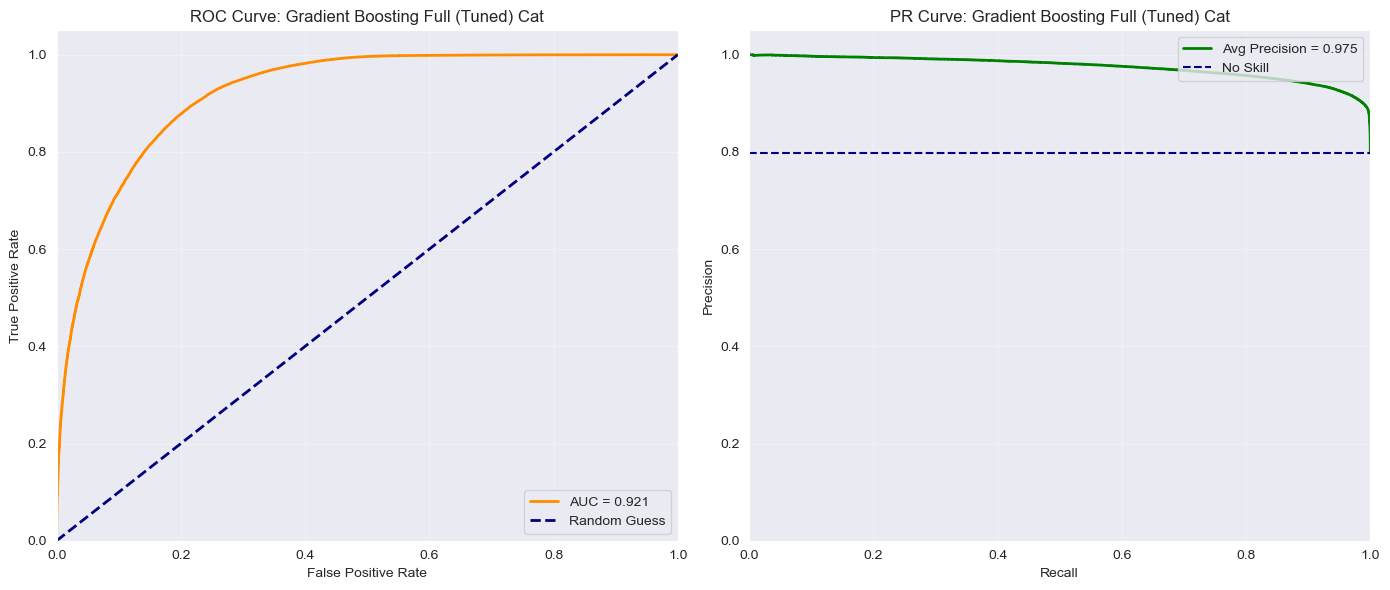

In [73]:
from sklearn.model_selection import GridSearchCV

gb_cat = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search_cat = GridSearchCV(
    estimator=gb_cat,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

grid_search_cat.fit(X_train_cat, y_train)

print(f"Best Parameters: {grid_search_cat.best_params_}")
print(f"Best Score: {grid_search_cat.best_score_}")

best_gb_model_cat = grid_search_cat.best_estimator_

results.append(
    evaluate_and_graph(best_gb_model_cat, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting Full (Tuned) Cat", True)
)

In [74]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 37
Valid Models: 35
Disqualified Models: 2

⚠️ The following models were disqualified due to overfitting:


model  accuracy       auc  train_auc  overfitting_gap
24   Bagging (Trees) Cat  0.896453  0.902929        1.0         0.097071
25  Bagging (Trees) Full  0.896066  0.904318        1.0         0.095682

Best by Accuracy:


model  accuracy       auc  average_precision  train_accuracy  train_auc  \
7  LDA Full  0.882603  0.911248           0.971096        0.821676   0.910064   

   overfitting_gap  is_overfit  
7        -0.001184       False

Best by AUC:


model  accuracy       auc  average_precision  \
36  Gradient Boosting Full (Tuned) Cat  0.867261  0.921377           0.974728   

    train_accuracy  train_auc  overfitting_gap  is_overfit  
36        0.843193   0.925433         0.004056       False

Best by Average Precision:


model  accuracy       auc  average_precision  \
36  Gradient Boosting Full (Tuned) Cat  0.867261  0.921377           0.974728   

    train_accuracy  train_auc  overfitting_gap  is_overfit  
36        0.843193   0.925433         0.004056       False


Final ranking (higher = better):


model  accuracy       auc  average_precision  \
36  Gradient Boosting Full (Tuned) Cat  0.867261  0.921377           0.974728   
28               Gradient Boosting Cat  0.861997  0.916442           0.973057   
29              Gradient Boosting Full  0.862244  0.916409           0.973046   
26                   Random Forest Cat  0.869887  0.913046           0.971489   
22         Decision Tree (Entropy) Cat  0.862979  0.912071           0.968335   
23        Decision Tree (Entropy) Full  0.863265  0.911961           0.968231   
3             Logistic Regression Full  0.863013  0.911734           0.971320   
5               Softmax Regression Cat  0.863013  0.911726           0.971319   
27                  Random Forest Full  0.867092  0.911447           0.970863   
7                             LDA Full  0.882603  0.911248           0.971096   
4               Softmax Regression Cat  0.861363  0.911185           0.971133   
2              Logistic Regression Cat  0.861380  0.911180           0.971131   
21           Decision Tree (Gini) Full  0.862727  0.910838           0.966935   
20            Decision Tree (Gini) Cat  0.862777  0.910797           0.966890   
6                              LDA Cat  0.881402  0.910678           0.970862   
33            PCA + Random Forest Full  0.865936  0.905882           0.968328   
8                              QDA Cat  0.873467  0.904593           0.968185   
15                   SVM (Linear) Full  0.860400  0.903901           0.969047   
14                    SVM (Linear) Cat  0.860600  0.903656           0.968957   
9                             QDA Full  0.849915  0.901512           0.967447   
32             PCA + Random Forest Cat  0.855650  0.898172           0.965919   
18                       SVM (RBF) Cat  0.859700  0.892035           0.961763   
16                SVM (Polynomial) Cat  0.866200  0.890995           0.962828   
31      PCA + Logistic Regression Full  0.841728  0.890829           0.962816   
12         Naive Bayes (Bernoulli) Cat  0.851677  0.890707           0.961943   
30       PCA + Logistic Regression Cat  0.840285  0.889799           0.962455   
19                      SVM (RBF) Full  0.859700  0.889252           0.959460   
13        Naive Bayes (Bernoulli) Full  0.775751  0.888584           0.962546   
17               SVM (Polynomial) Full  0.859500  0.885580           0.958490   
35                PCA + SVM (RBF) Full  0.844300  0.877257           0.954573   
34                 PCA + SVM (RBF) Cat  0.844900  0.876130           0.954427   
10          Naive Bayes (Gaussian) Cat  0.827709  0.873282           0.949272   
11         Naive Bayes (Gaussian) Full  0.684628  0.866781           0.951344   
0                              PLA Cat  0.674235  0.851725           0.952492   
1                             PLA Full  0.881172  0.847820           0.942506   

    overfitting_gap  
36         0.004056  
28        -0.000921  
29        -0.000901  
26         0.002408  
22         0.004775  
23         0.004926  
3         -0.001215  
5         -0.001211  
27         0.001723  
7         -0.001184  
4         -0.001383  
2         -0.001381  
21         0.006292  
20         0.006374  
6         -0.001373  
33         0.008672  
8         -0.001075  
15         0.009662  
14         0.007470  
9         -0.000750  
32         0.008748  
18         0.030612  
16         0.025411  
31        -0.001280  
12        -0.000651  
30        -0.001361  
19         0.042414  
13        -0.000632  
17         0.046915  
35         0.043926  
34         0.023715  
10         0.000639  
11        -0.000409  
0         -0.001231  
1         -0.000323


🏆 Best model: Gradient Boosting Full (Tuned) Cat


# Submission for Kaggle

Because I am lazy, this is manually done... so yeah. Didn't make a function to automatically do this

In [75]:
testing_scaled_num = scaler.transform(testing[numerical_vars])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=numerical_vars,
    index=testing.index
)

testing_cat_dummies = pd.get_dummies(testing[categorical_vars], drop_first=True)

_, testing_encoded_aligned = X_train_encoded_cat.align(
    testing_cat_dummies,
    join='left',
    axis=1,
    fill_value=0
)

testing_cat_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {X_train_cat.shape}")
print(f"Testing shape:  {testing_cat_final.shape}")

Training shape: (664784, 25)
Testing shape:  (254569, 25)


In [76]:
predictions = best_gb_model_cat.predict_proba(testing_cat_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'loan_paid_back': predictions
})

# 7. Save to CSV
submission.to_csv('submission_class_models.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


id  loan_paid_back
0  593994        0.772366
1  593995        0.932163
2  593996        0.203897
3  593997        0.775148
4  593998        0.842312